In [285]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click /off the raw code."></form>''')

# Import Libraries

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [288]:
plt.rcParams['figure.figsize'] = [15,8]

# DATASET DESCRIPTION

<b>Subject.ID -</b> Unique Id of the patient<br>
<b>MRI.ID -</b> Unique Id generated after conducting MRI on patient<br>
<b>Group -</b> It is a group of Converted (Previously Normal but developed dimentia later), Demented and Nondemented (Normal Pateints)<br>
<b>Visit -</b> Number of visit to detect dementia status<br>
<b>MR.Delay -</b> Not Known<br>

<b>Demographics Information</b><br>

<b>M.F - </b>Gender<br>
<b>Hand - </b>Handedness<br>
<b>Age<br></b>
<b>EDUC -</b> Years of education<br>
<b>SES -</b> Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)<br>

<b>Clinical Information<br></b>

<b>MMSE - </b>Mini-Mental State Examination score (range is from 0 = worst to 30 = best)<br>
<b>CDR -</b> Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)<br>

<b>Derived anatomic volumes<br></b>
<b>eTIV -</b> Estimated total intracranial volume, mm3<br>
<b>nWBV - </b>Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process<br>
<b>ASF -</b> Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)<br>

# Importing dataset

In [289]:
df_dementia=pd.read_csv('oasis_longitudinal.csv')
df_dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.000000,0.000000,1987,0.696000,0.883000
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.000000,0.000000,2004,0.681000,0.876000
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.000000,0.500000,1678,0.736000,1.046000
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.000000,0.500000,1738,0.713000,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.000000,0.500000,1698,0.701000,1.034000


In [290]:
# dropping irrelevant columns
df_dementia=df_dementia.drop(['Subject ID','MRI ID','Hand'],axis=1)
df_dementia.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.000000,27.000000,0.000000,1987,0.696000,0.883000
1,Nondemented,2,457,M,88,14,2.000000,30.000000,0.000000,2004,0.681000,0.876000
2,Demented,1,0,M,75,12,NaN,23.000000,0.500000,1678,0.736000,1.046000
3,Demented,2,560,M,76,12,NaN,28.000000,0.500000,1738,0.713000,1.010000
4,Demented,3,1895,M,80,12,NaN,22.000000,0.500000,1698,0.701000,1.034000


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> Subject ID and MRI ID and Hand is irrelevant for analysis so we drop it</b>

In [291]:
df_dementia1=df_dementia

In [292]:
df_dementia.shape

(373, 12)

In [293]:
df_dementia.dtypes

Group        object
Visit         int64
MR Delay      int64
M/F          object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [294]:
df_dementia['MMSE'] = pd.to_numeric(df_dementia['MMSE'],errors='coerce')

In [295]:
df_dementia['CDR'] = pd.to_numeric(df_dementia['CDR'],errors='coerce')

In [296]:
df_dementia.dtypes

Group        object
Visit         int64
MR Delay      int64
M/F          object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [297]:
df_dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [298]:
df_dementia.describe(include='object')

,Group,M/F
count,373,373
unique,3,2
top,Nondemented,F
freq,190,213


In [299]:
df_dementia.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>SES and MMSE has null values,so we replace it with mean</b>

In [300]:
df_dementia.SES.describe()

count   354.000000
mean      2.460452
std       1.134005
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: SES, dtype: float64

In [301]:
df_dementia.SES.mode()

0   2.000000
Name: SES, dtype: float64

In [302]:
df_dementia.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>SES has only integer values so we have to replace it with median or mode</b>

In [303]:
df_dementia.SES.mean()

np.float64(2.4604519774011298)

In [304]:
df_dementia.SES.median()

np.float64(2.0)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b> Mean,median and mode is close to 2 so we replace null values of SES by 2</b>

In [305]:
df_dementia.MMSE.mode()

0   30.000000
Name: MMSE, dtype: float64

In [306]:
df_dementia.MMSE.unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

In [307]:
df_dementia.MMSE.describe()

count   371.000000
mean     27.342318
std       3.683244
min       4.000000
25%      27.000000
50%      29.000000
75%      30.000000
max      30.000000
Name: MMSE, dtype: float64

In [308]:
df_dementia["SES"].fillna(df_dementia["SES"].median(), inplace=True)
df_dementia["MMSE"].fillna(df_dementia["MMSE"].median(), inplace=True)

<Axes: >

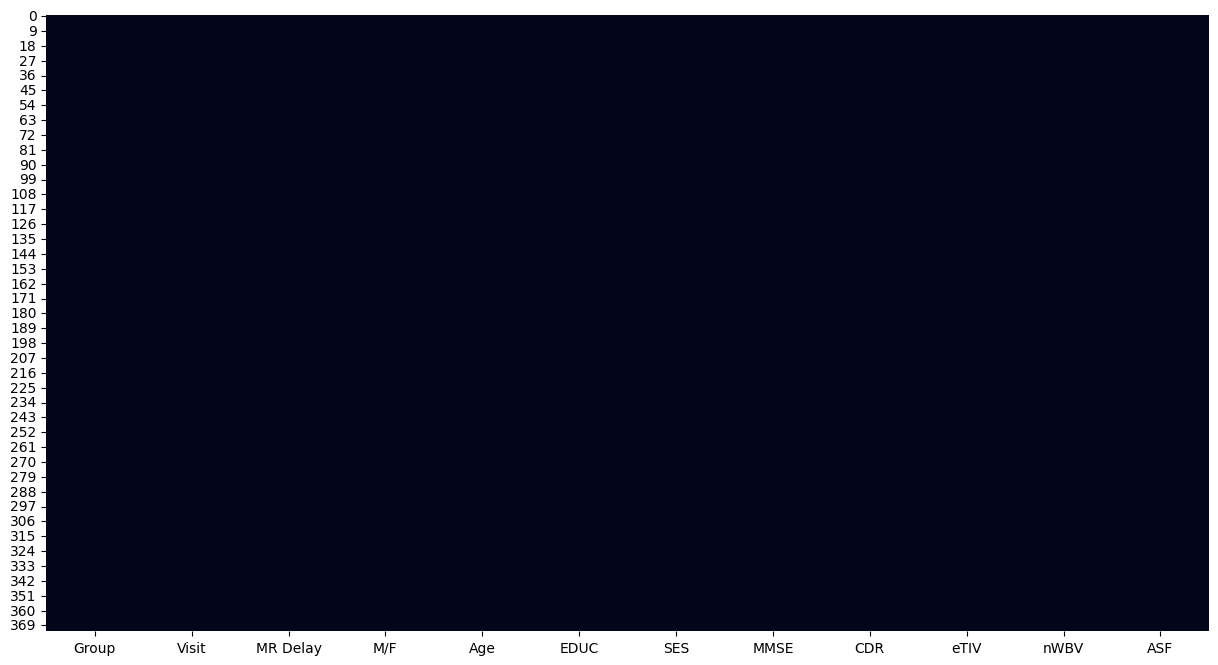

In [309]:
sns.heatmap(data=df_dementia.isnull(),cbar=False)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>Now there are no missing values so we can move forward</b>

<b> Checking for outliers
    

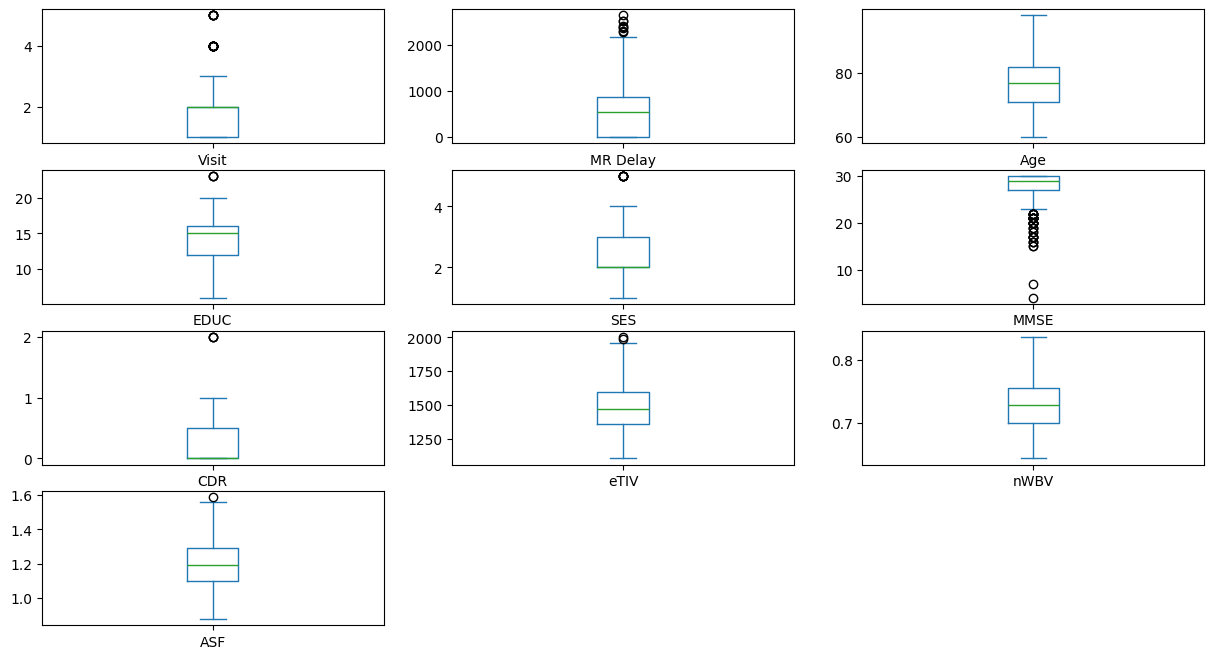

In [310]:
df_dementia.plot(kind='box',subplots=True,layout=(4,3))
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>All the columns have outliers excluding nWBV and Age</b>

# Exploratory Data Analysis

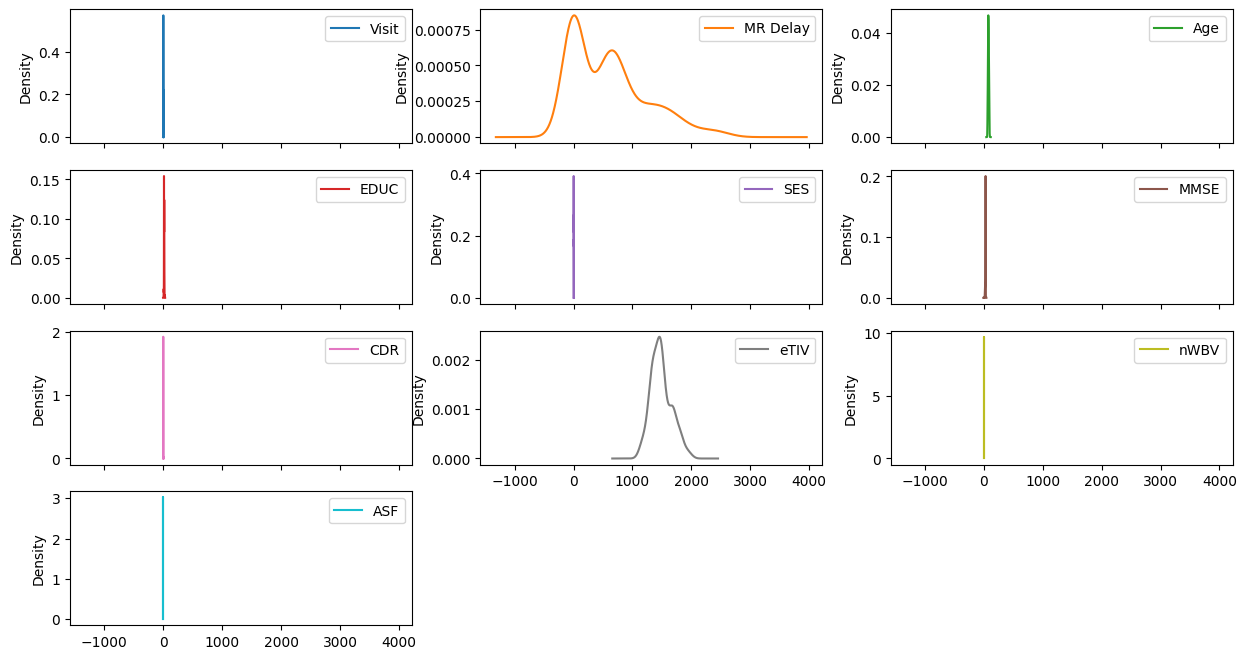

In [311]:
df_dementia.plot(kind='density',subplots=True,layout=(4,3))
plt.show()

In [312]:
def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = df_dementia1[var].unique().tolist()
  df_dementia1[var].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2})
  plt.title("Distribution of "+ var +"  variable")



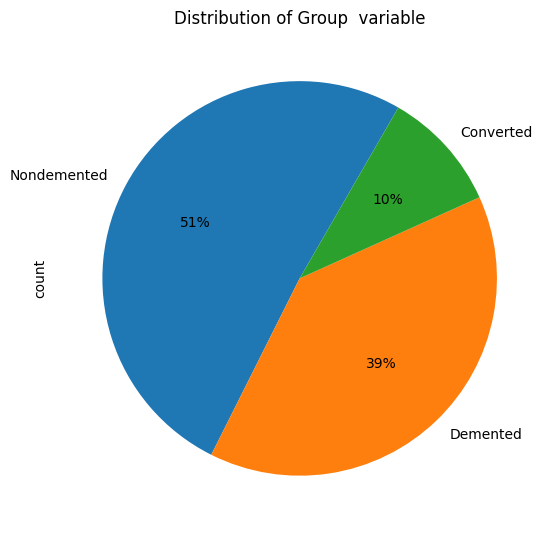

In [313]:
plot_piechart('Group')

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>49% of them are Demented</b>

<b>So we analyze numerical features and performed univariate analysis on those features to see if we find any pattern or some interesting insights.
So, we first begin with analyzing the most important categorical feature i.e., Clinical Dementia Rating (CDR).</b>

In [314]:
df_dementia1.Group.describe()

count             373
unique              3
top       Nondemented
freq              190
Name: Group, dtype: object

In [315]:
df_dementia1['CDR'].describe()

count   373.000000
mean      0.290885
std       0.374557
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       2.000000
Name: CDR, dtype: float64

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>This score is useful for characterizing and tracking a patient’s level of impairment/dementia:<br>

0 = Normal<br>
0.5 = Very Mild Dementia or Questionable<br>
1 = Mild Dementia<br>
2 = Moderate Dementia<br>
3 = Severe Dementia<br></b>

In [316]:
df_dementia1.CDR.describe()

count   373.000000
mean      0.290885
std       0.374557
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       2.000000
Name: CDR, dtype: float64

In [317]:
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = df_dementia1.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = df_dementia1.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()



# Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'



<Axes: xlabel='CDR', ylabel='count'>

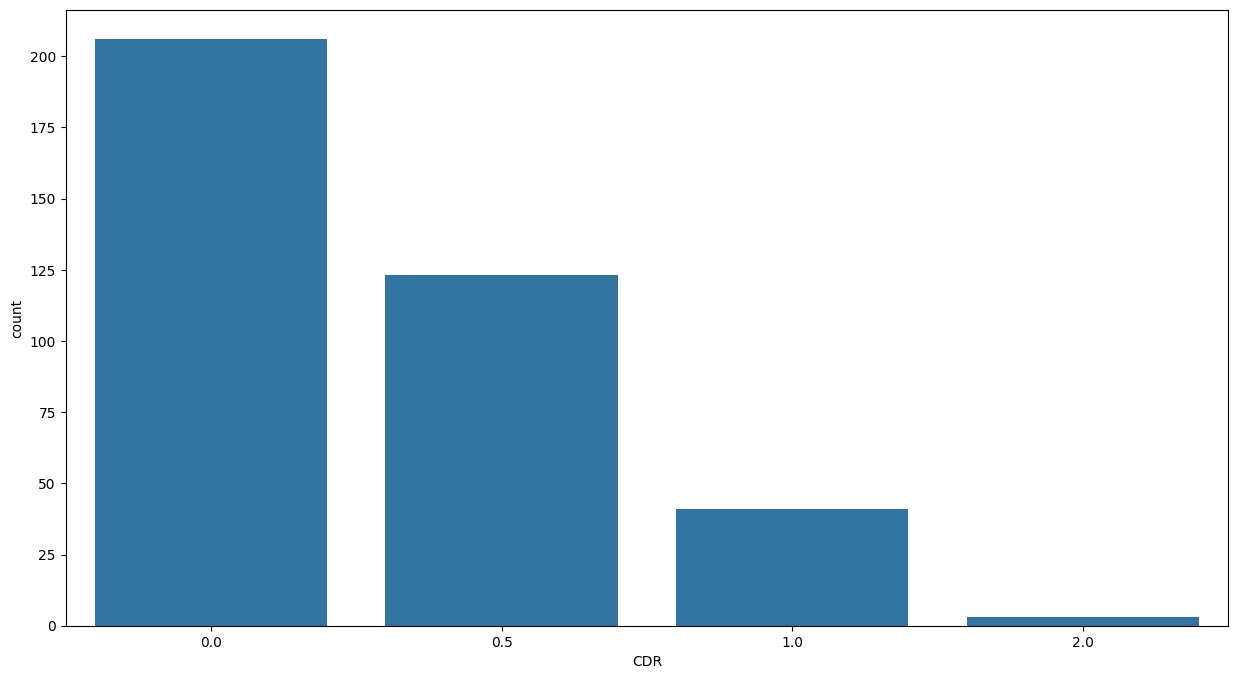

In [318]:
sns.countplot(x='CDR',data=df_dementia1)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> CDR value of 0 is higher than the rest of them.</b>

In [319]:
df_dementia1['CDR'] = df_dementia1['CDR'].apply(lambda x: cat_CDR(x))

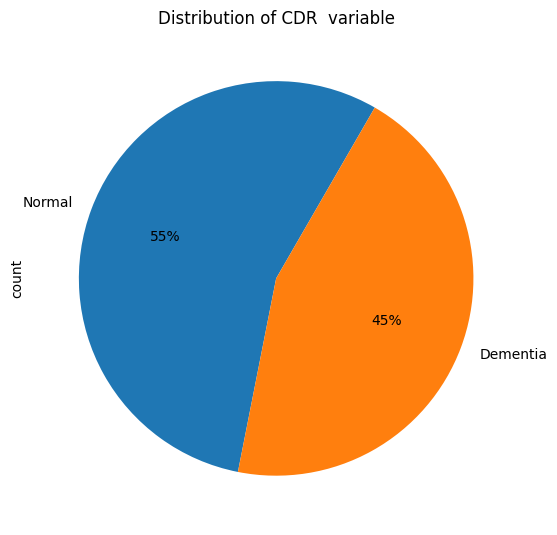

In [320]:
plot_piechart('CDR')

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> Distribution of CDR variable.</b>

In [321]:
df_dementia1['MMSE'].describe()

count   373.000000
mean     27.351206
std       3.675329
min       4.000000
25%      27.000000
50%      29.000000
75%      30.000000
max      30.000000
Name: MMSE, dtype: float64

In [322]:
df_dementia1.MMSE.value_counts()

MMSE
30.000000    114
29.000000     93
28.000000     45
27.000000     32
26.000000     20
25.000000     12
21.000000     11
23.000000     11
20.000000      7
22.000000      7
17.000000      5
24.000000      4
16.000000      3
19.000000      3
15.000000      2
18.000000      2
4.000000       1
7.000000       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot for MMSE Values')

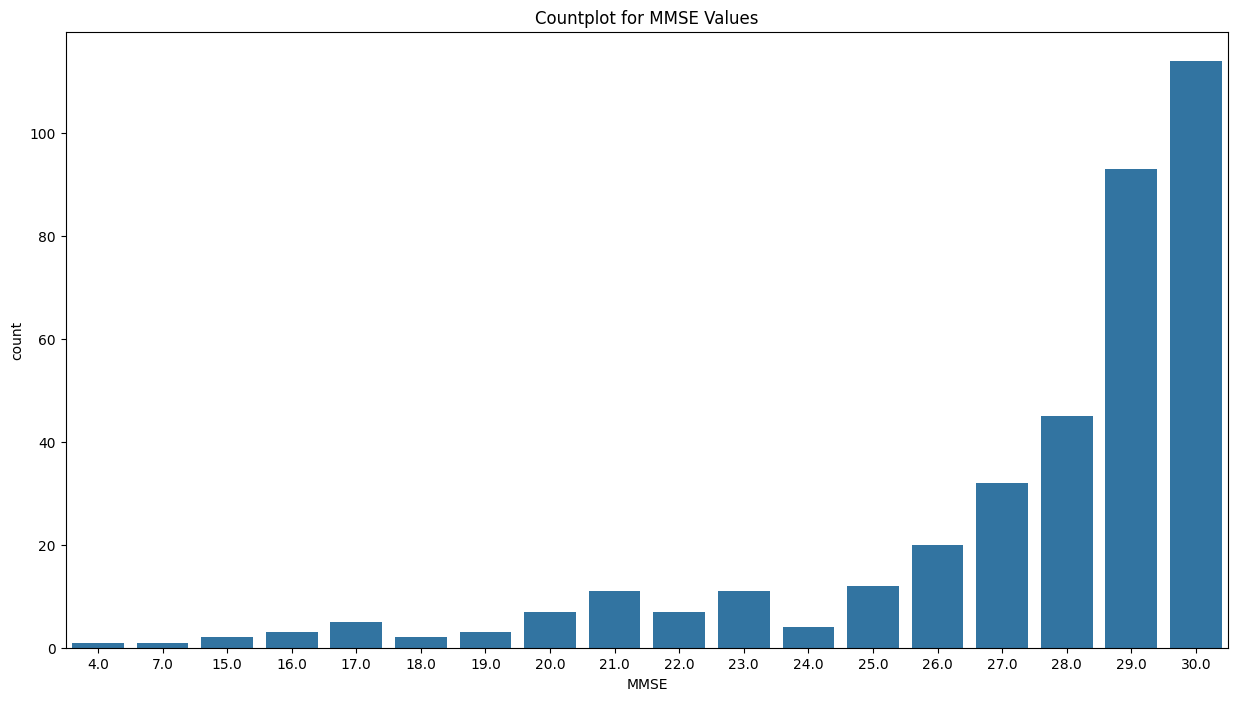

In [323]:
sns.countplot(x='MMSE',data=df_dementia1)
plt.title("Countplot for MMSE Values")

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> <b>MMSE values of 30 has the highest count.</b>

In [324]:
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                   
        return 'Mild'



In [325]:
df_dementia1['MMSE'] = df_dementia1['MMSE'].apply(lambda x: cat_MMSE(x))

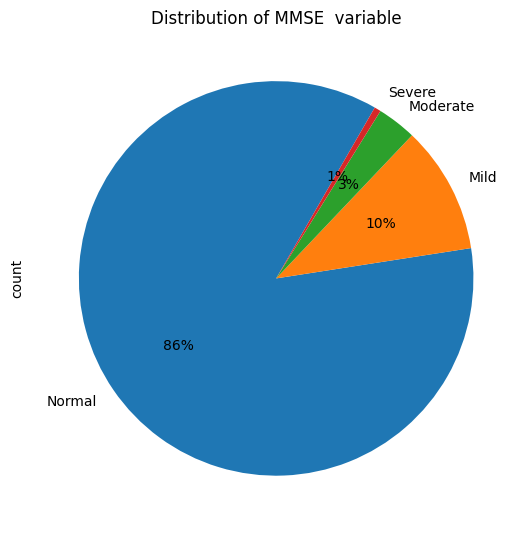

In [326]:
plot_piechart('MMSE')


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> <b>The Normal MMSE is the highest at 86%.</b>

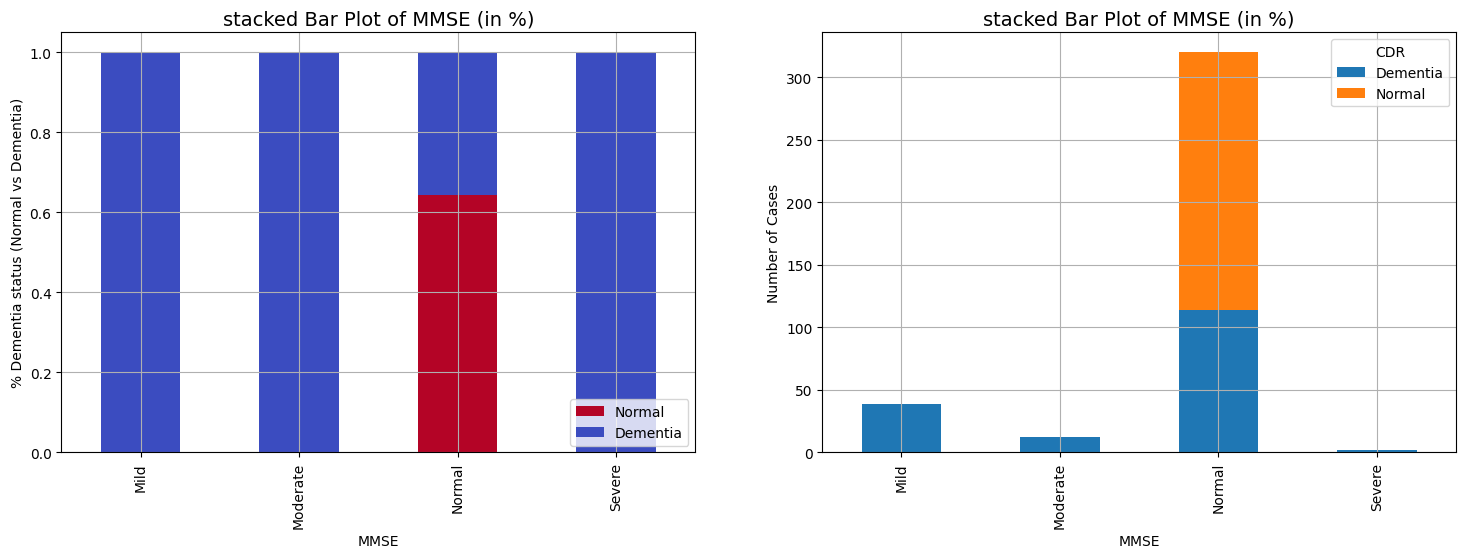

In [327]:
univariate_percent_plot('MMSE')

In [328]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_dementia1.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'Nondemented'

<Figure size 1400x800 with 0 Axes>

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>As we can see Visit and MR Delay are showing close correlation to 0.92.</b>
<b>As we can see from the above plot, there are around 40% of the cases in Normal MMSE status are of dementia cases accroding to CDR scoring.<b>
    


  

<b>Next we will analyze Age feature to see how age is impacting the dementia status.</b>

In [92]:
df_dementia.Age.describe()

count   373.000000
mean     77.013405
std       7.640957
min      60.000000
25%      71.000000
50%      77.000000
75%      82.000000
max      98.000000
Name: Age, dtype: float64

<Axes: ylabel='count'>

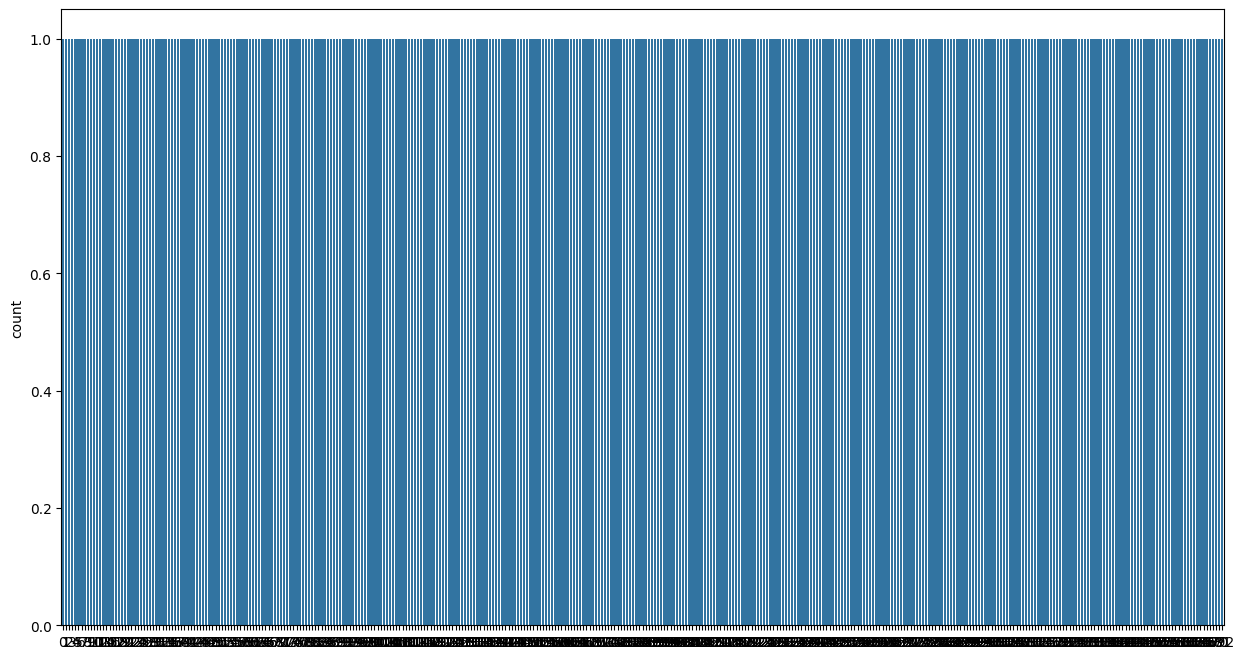

In [93]:
sns.countplot(df_dementia['Age'])

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> Most of the people are of the age 73.</b>

In [94]:
df_dementia1['age_group'] = pd.cut(df_dementia1['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df_dementia1['age_group'].value_counts()

age_group
70-80     173
80-90     107
60-70      75
90-100     16
Name: count, dtype: int64

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> Age group of 70-80 has the highest count.</b>

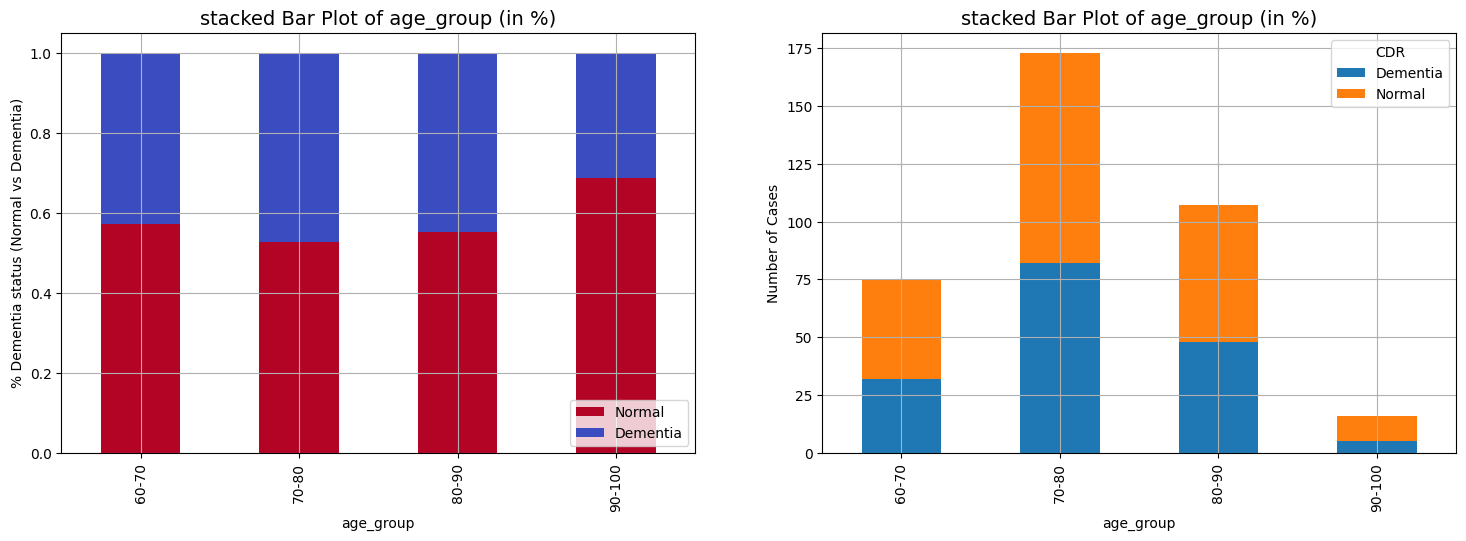

In [95]:
# Now plotting age group to see dementia distribution
univariate_percent_plot('age_group')

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span><b> Almost half of the people in the age group of 70-80 is demented.</b>

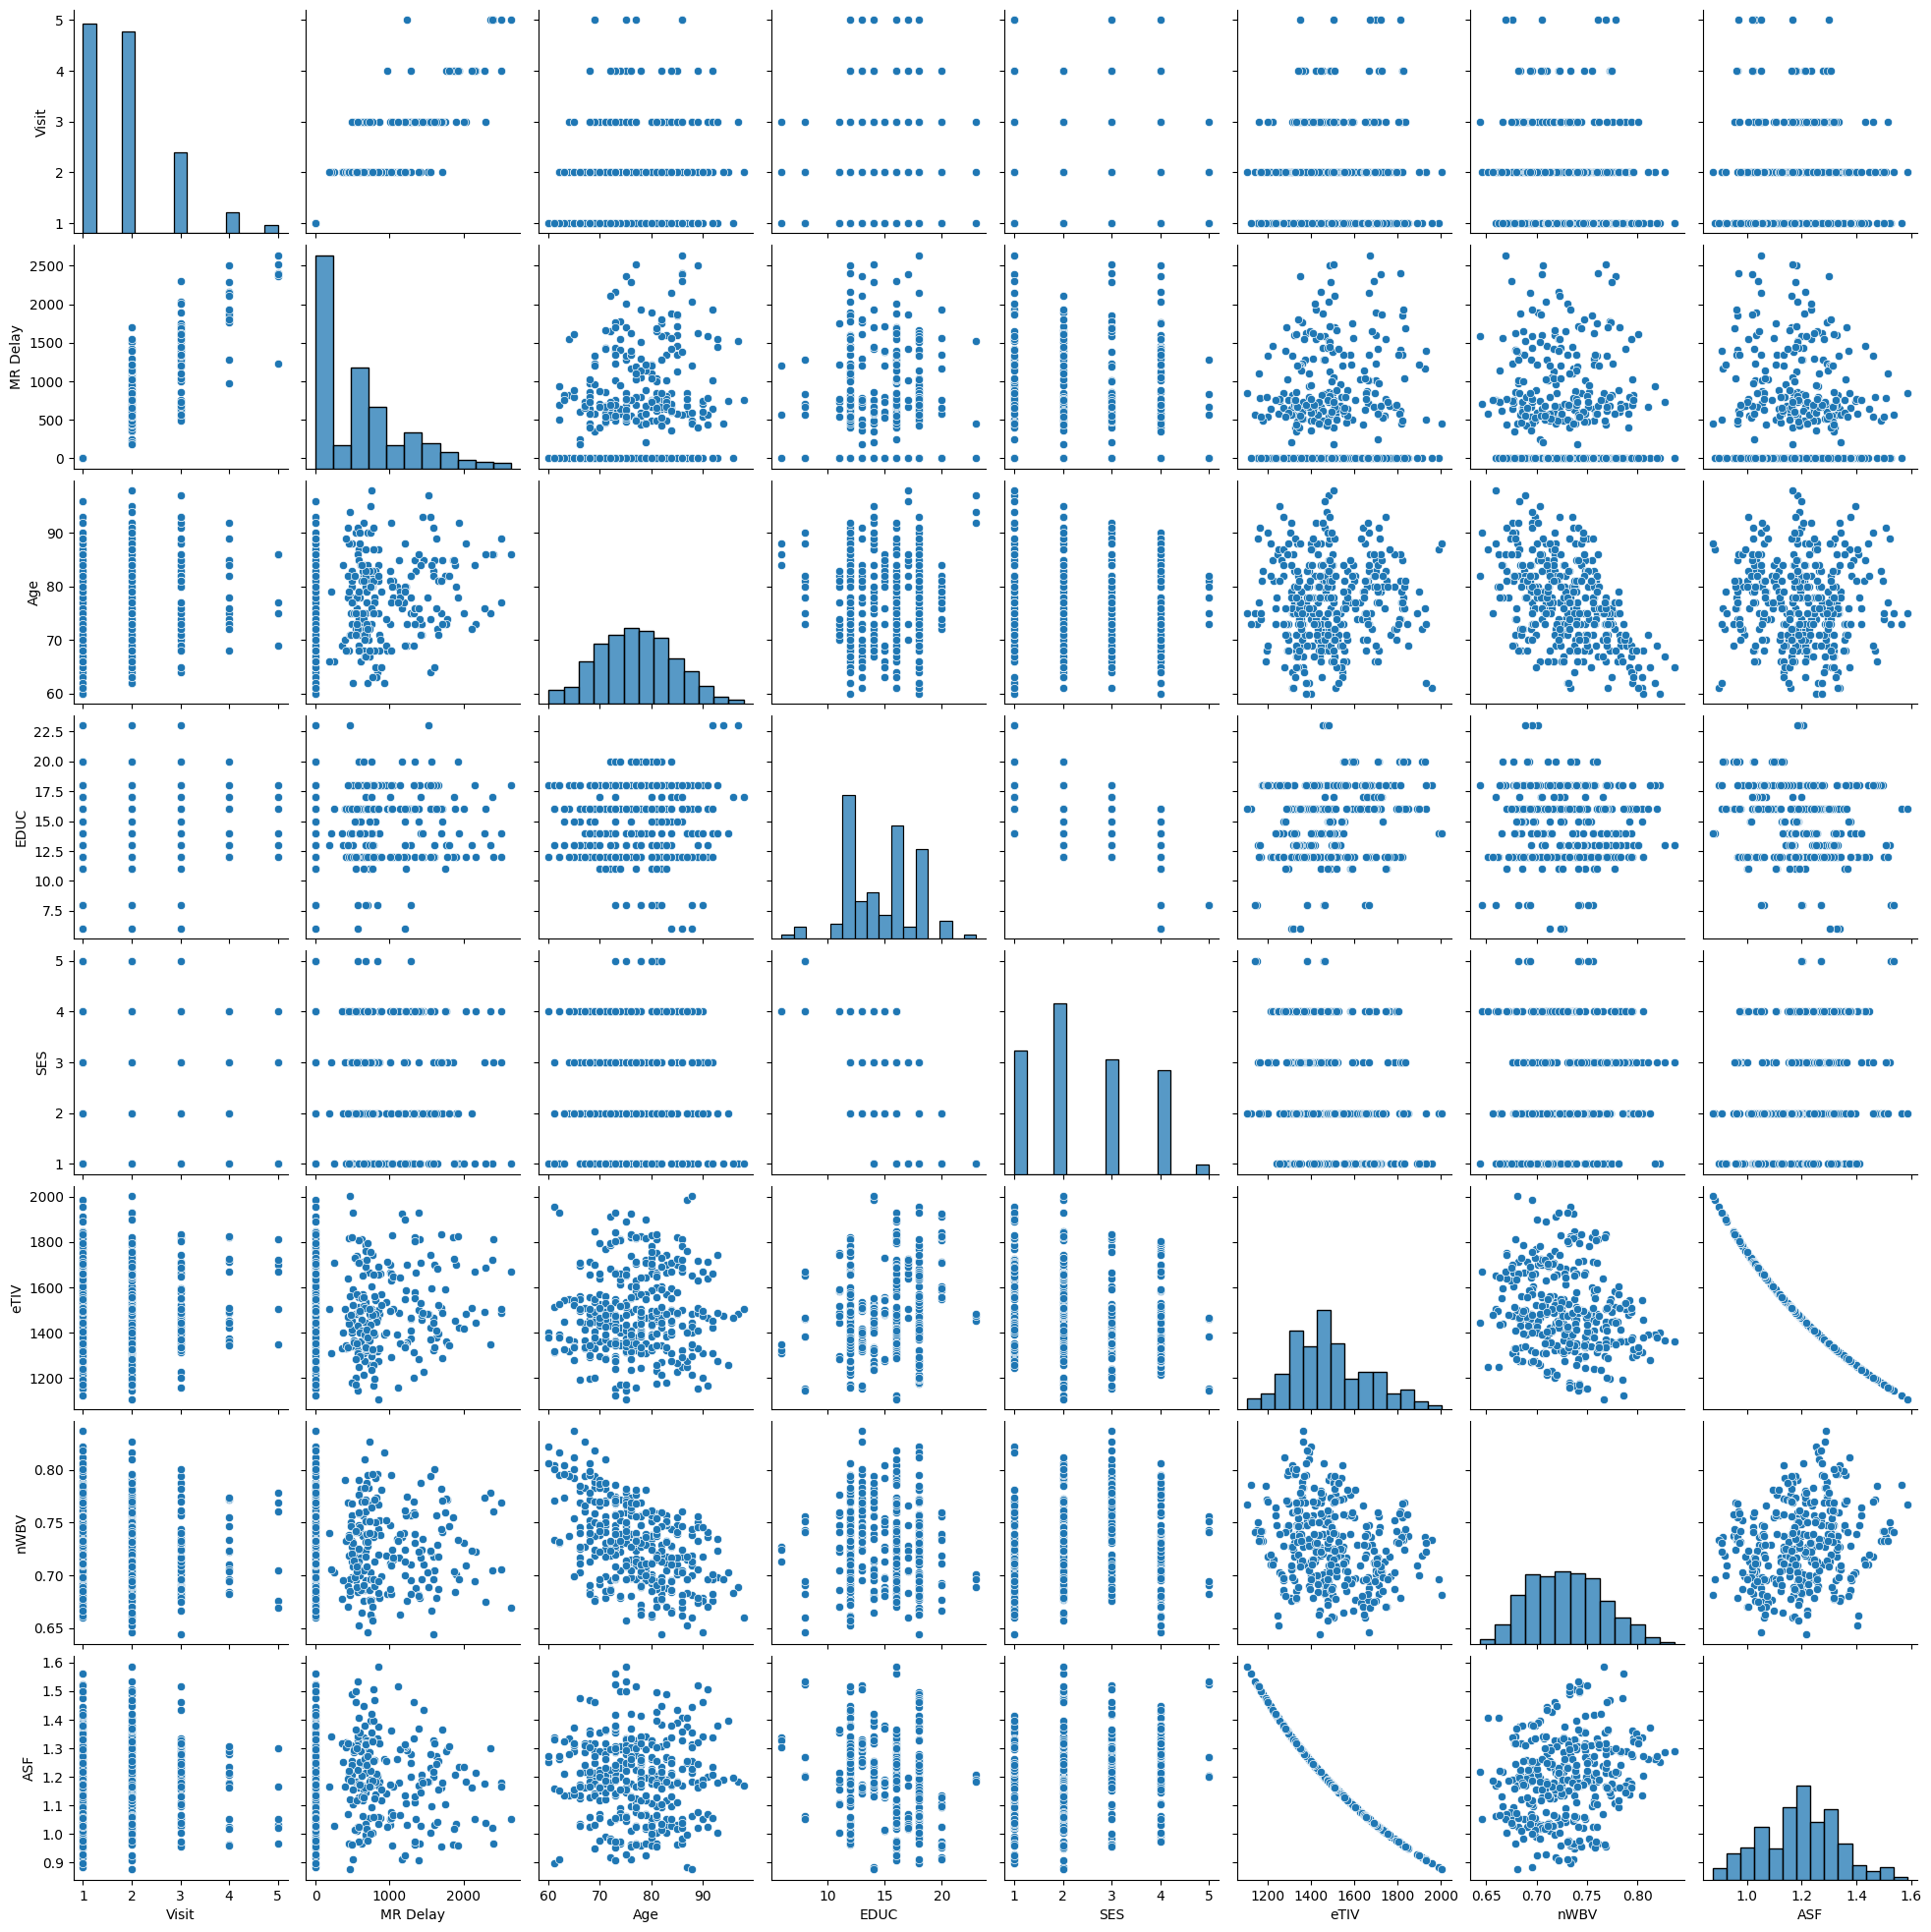

In [96]:
sns.pairplot(df_dementia)
plt.show()

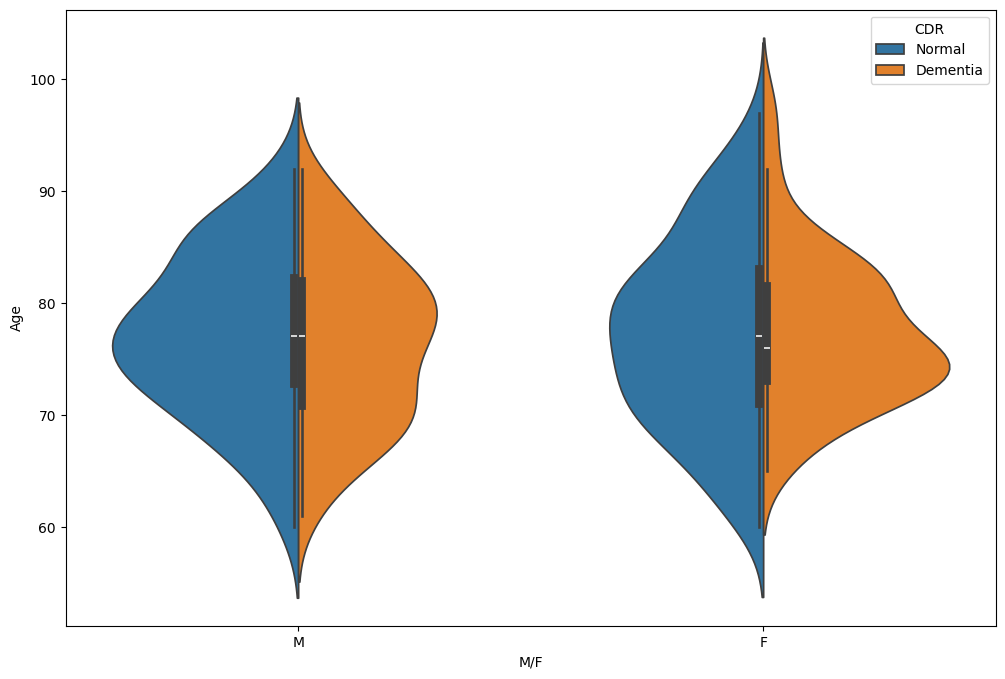

In [97]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR",split=True, data=df_dementia)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 

<b>As we can observe from the above plot, in case of Male most number of dementia cases are reported in the age of around 80 years while in case of females dementia is prevalent in 75 years of Age. One more observation suggests that in case of Males dementia starts early even before 60 years of age while in case of females demetia generally after 60 years of age.

Next we will analyze another important feature named eTIV.</b>

In [98]:
df_dementia['eTIV'].describe()

count    373.000000
mean    1488.128686
std      176.139286
min     1106.000000
25%     1357.000000
50%     1470.000000
75%     1597.000000
max     2004.000000
Name: eTIV, dtype: float64

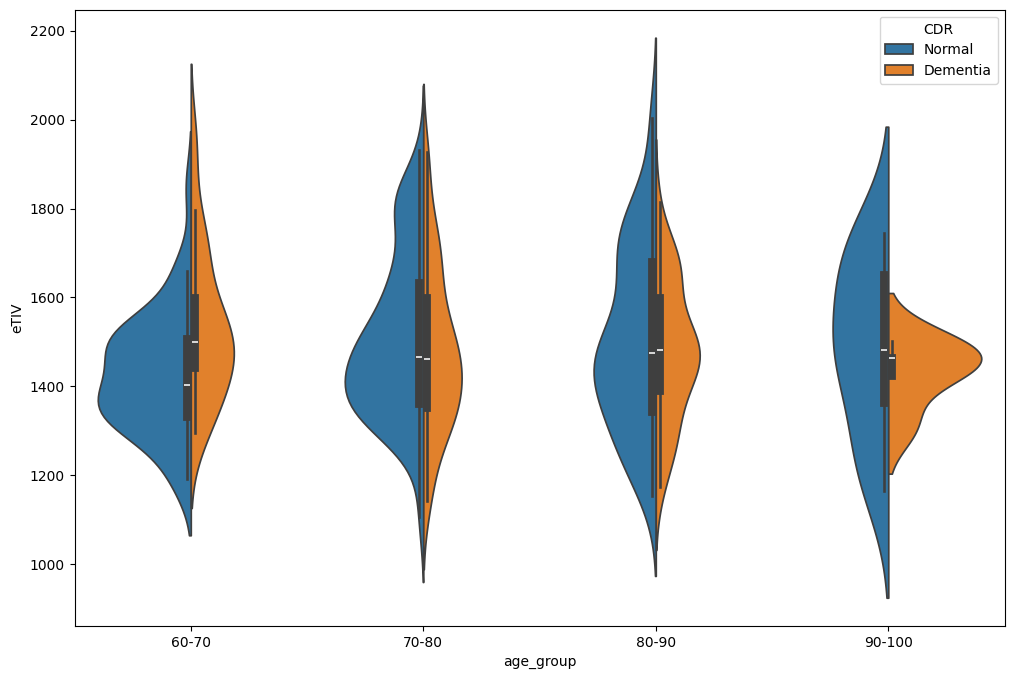

In [99]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="age_group", y="eTIV",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </span> 
<b>The eTIV of all the age groups are between 1400 and 1600. For the age group of 90-100 it's only between 1200 and 1600 whereas for the rest it starts from 1000 and ends somewhere around 2100.</b>

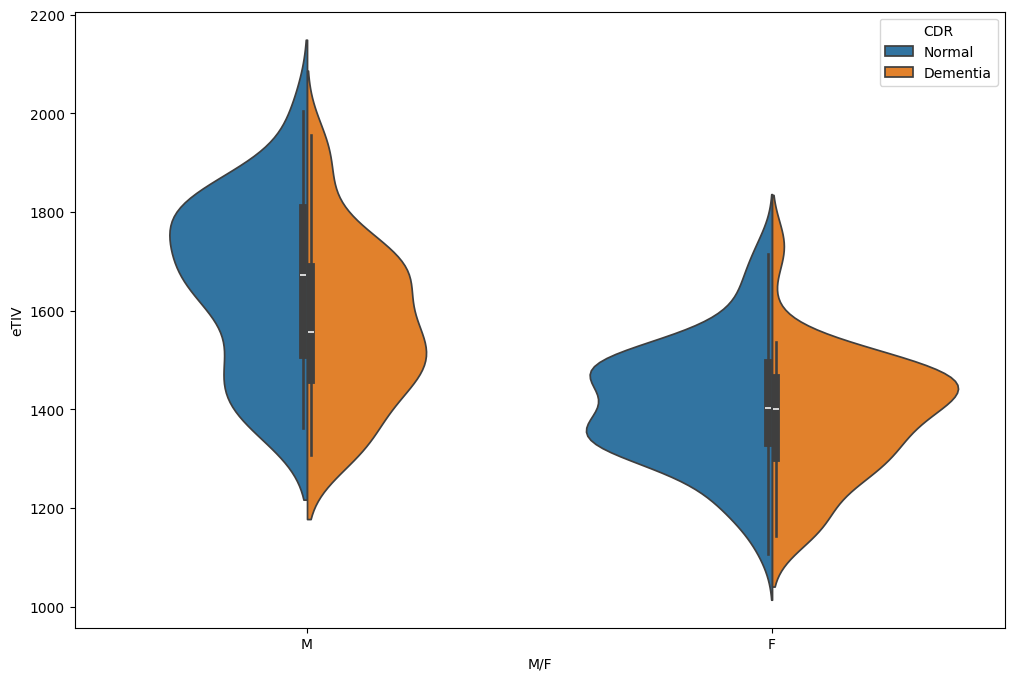

In [100]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process.</b>

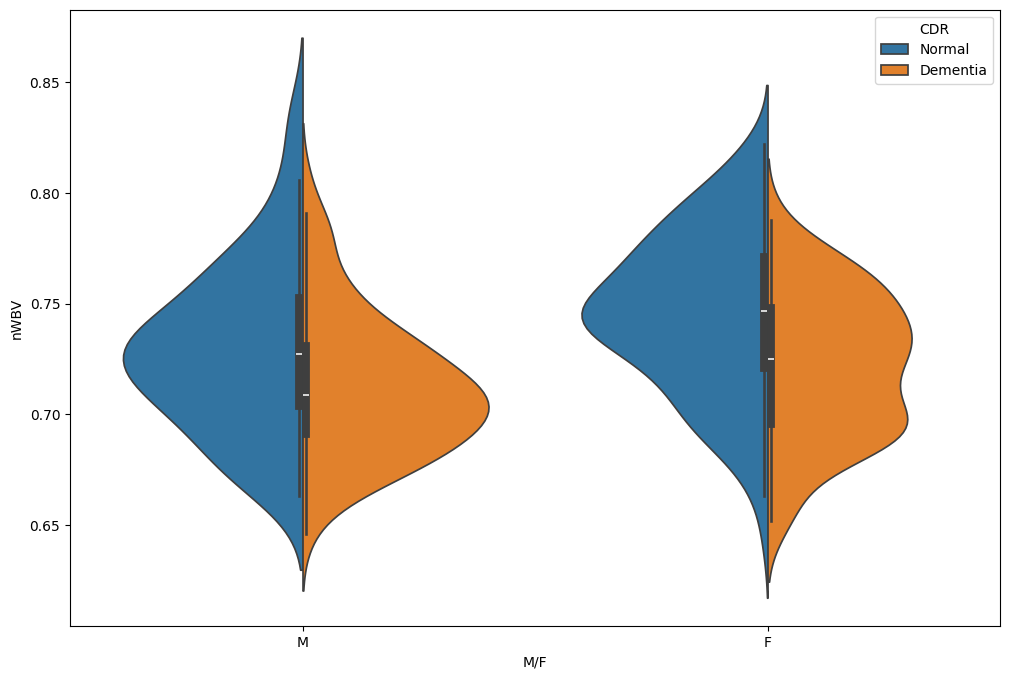

In [101]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="nWBV",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The nWBV of male and female are different. For male the demented poeple have a nWBV is high between 0.65 and 0.75.</b>

In [102]:
df_dementia['EDUC'].describe()

count   373.000000
mean     14.597855
std       2.876339
min       6.000000
25%      12.000000
50%      15.000000
75%      16.000000
max      23.000000
Name: EDUC, dtype: float64

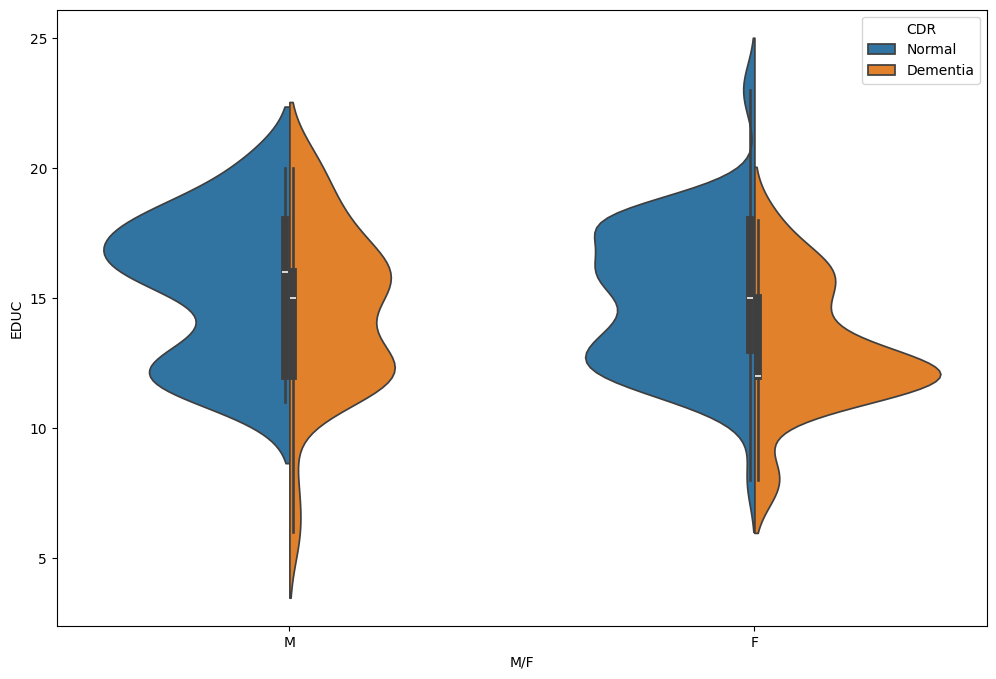

In [103]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>As we can observe from the above plot,Mens having education level between 10 and 17 have higher level of dementia cases and mens started to show dymentia symptoms with less education levels starting from 4 years whereas females starts showing dymentia symptoms after 6 years of education level having highest peak at 13 years of age.</b>

In [104]:
df_dementia['SES'].describe()

count   373.000000
mean      2.436997
std       1.109307
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: SES, dtype: float64

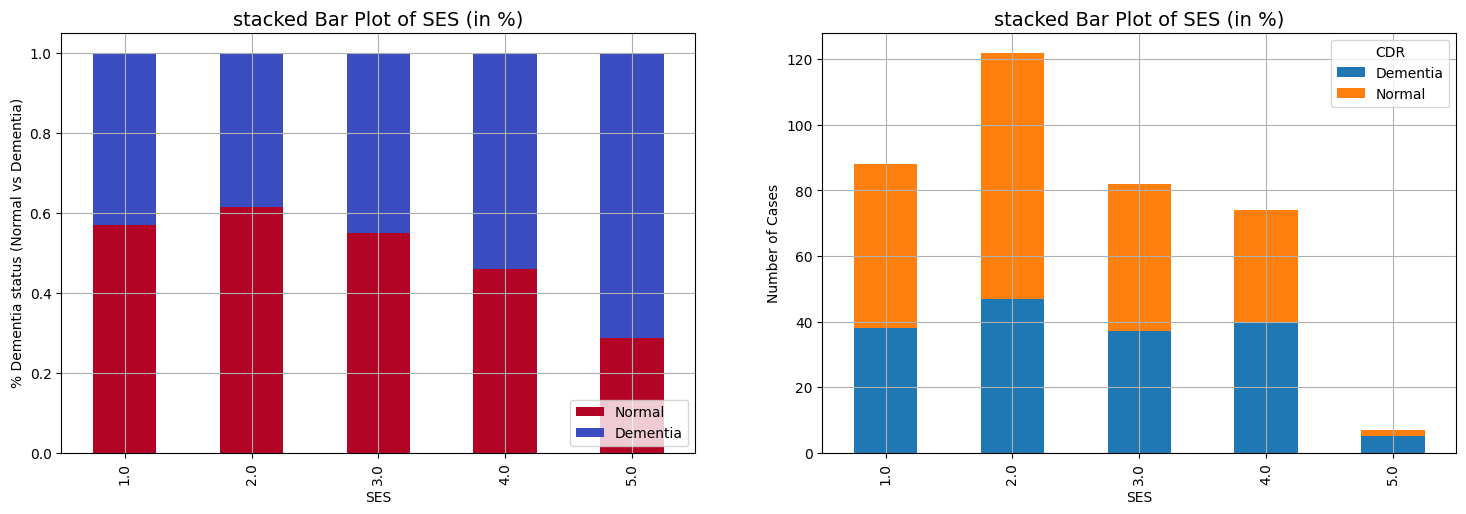

In [105]:

univariate_percent_plot('SES')

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>At lowest level of socio economic status there is a highest probability of dementia which may be due to lower economic condition which results in depression, sufferings which in turn results in dementia.</b>

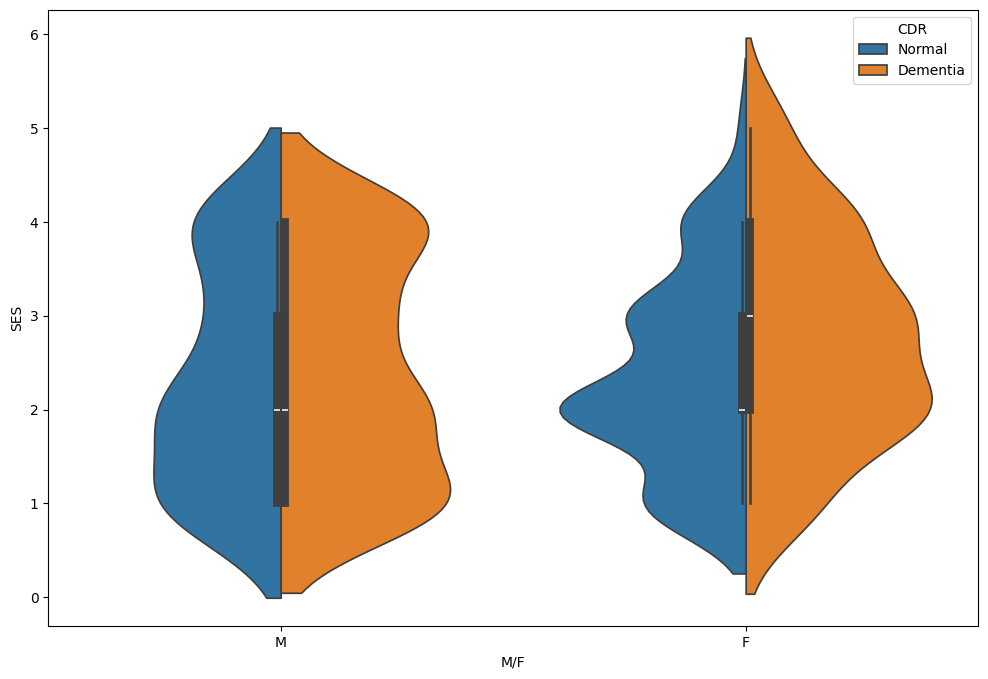

In [106]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>Interesting pattern observed from the above plot that in mens there are two peaks of highest dementia cases one at 1 (Highest status) and 4(lower status) and in between 1 and 4 there less instances of dementia cases whereas in case of females highest peak is at 2 whereas at 1 and 5 there are slightly less dementia cases reported.
It suggests that womens have less dementia probability at extreme higher and extreme lower level of socio economic status while mens have exactly opposite phenomenon.</b>

<b>ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)</b>

In [107]:
df_dementia['ASF'].describe()

count   373.000000
mean      1.195461
std       0.138092
min       0.876000
25%       1.099000
50%       1.194000
75%       1.293000
max       1.587000
Name: ASF, dtype: float64

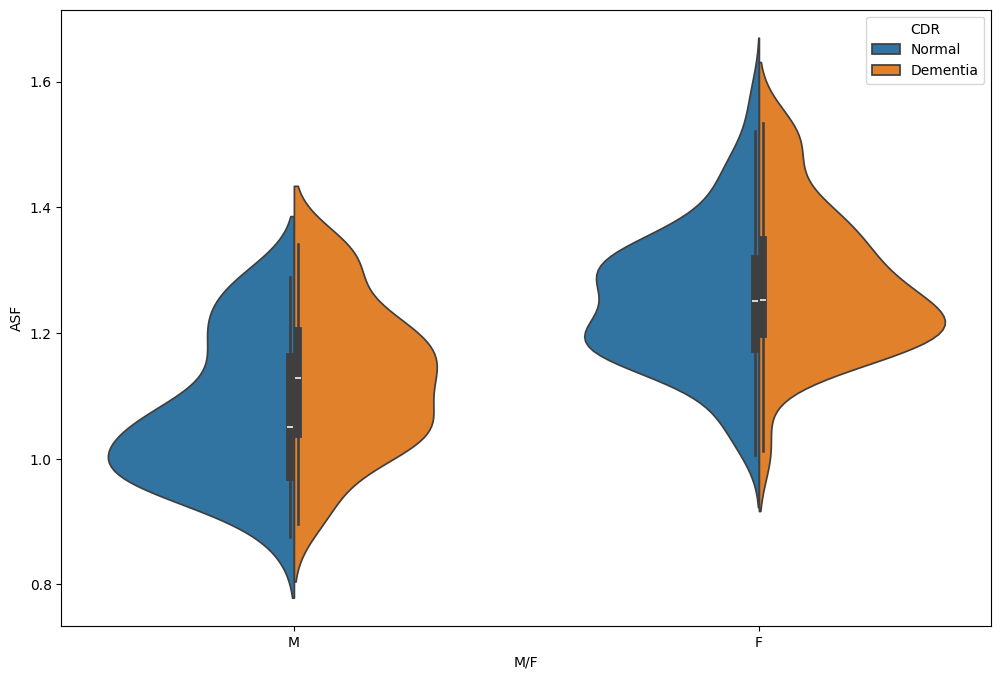

In [108]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="ASF",hue="CDR",split=True, data=df_dementia1)
plt.show()

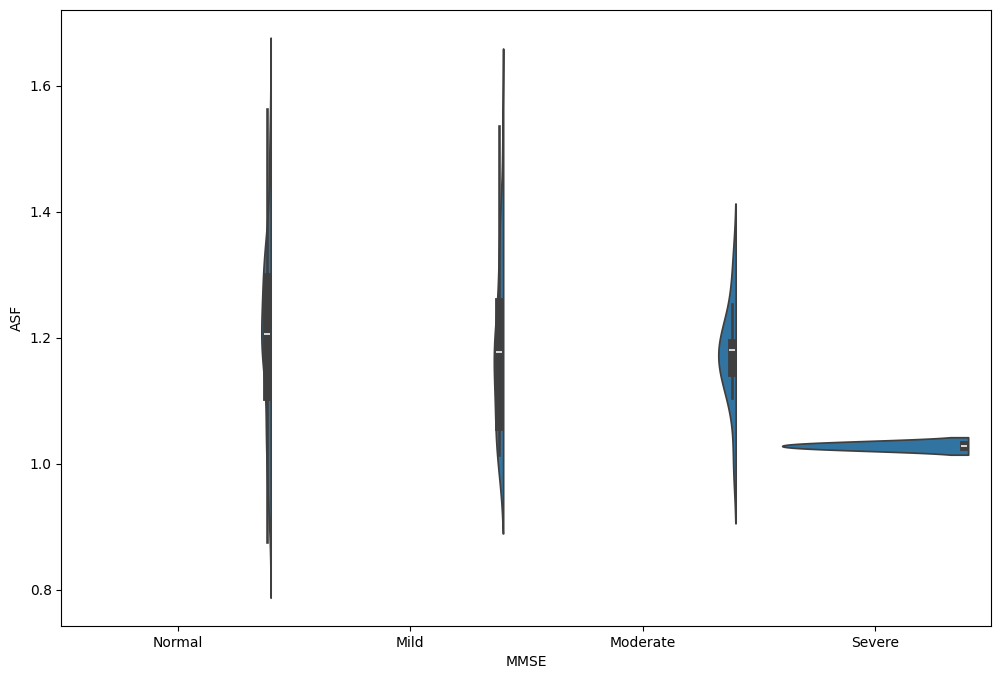

In [109]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="ASF",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>From the above plot we can get the intuition about ASF as in case of normal patients the value of ASF distributed between 0.8 and 1.6 but as the patients started showing dementia cases its value centered around 1 as in case of Mild, Moderate and Severe it shrinks down to 1.1</b>



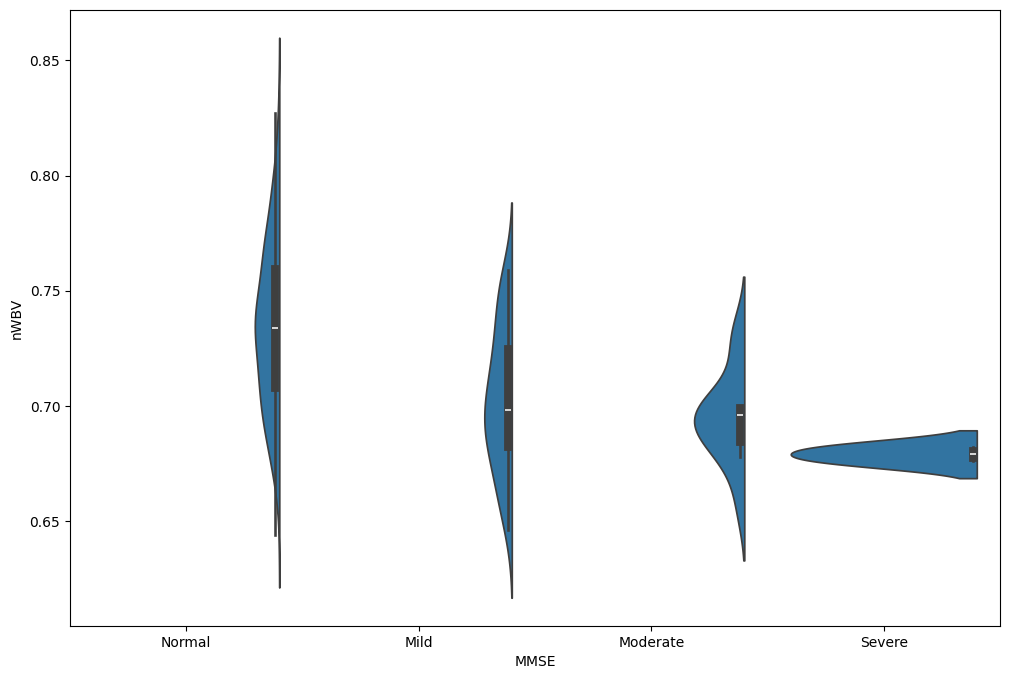

In [110]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="nWBV",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>Same pattern observed in case of nWBV as the dementia level increases nWBV centered between 0.65 and 0.70.</b>

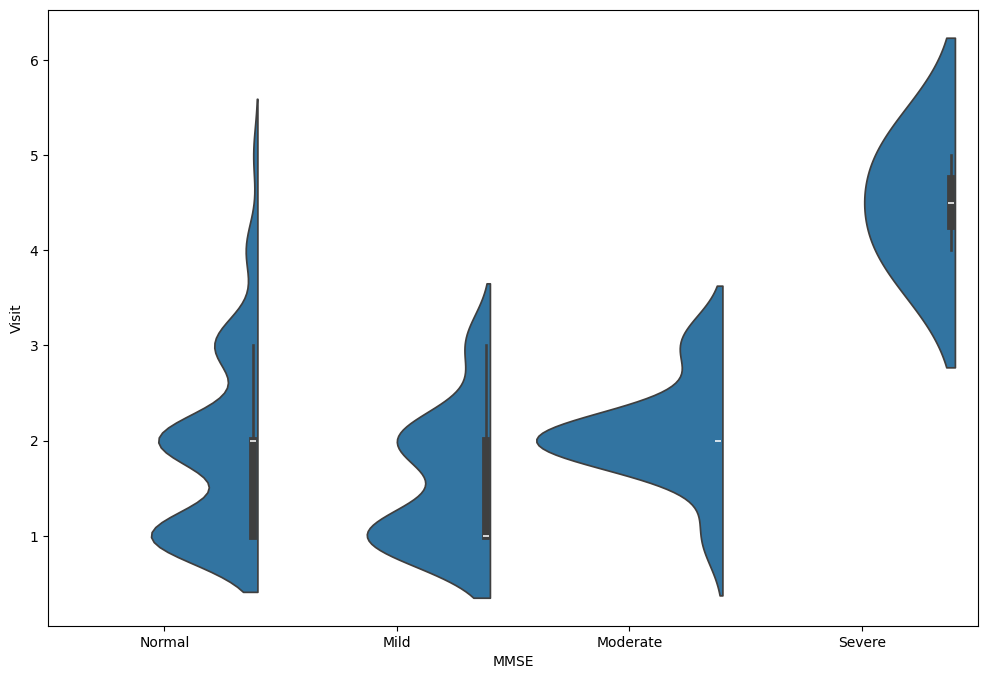

In [111]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="Visit",split=True, data=df_dementia1)
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>Severe Dementia cases starts reporting as the number of visits increases to more than 3 whereas normal cases are also reported after higher number of visits more than 3 but they are very few in number.</b>

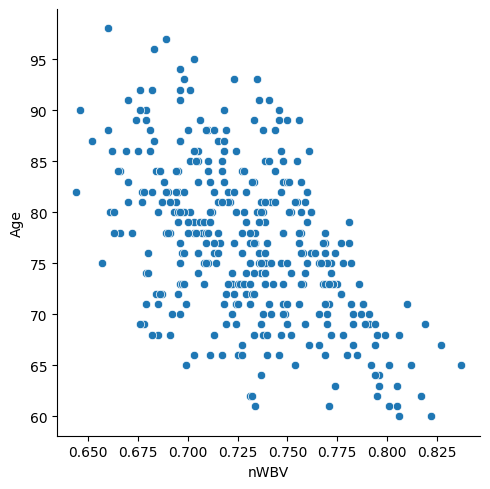

In [112]:
sns.relplot(x="nWBV", y="Age", data=df_dementia1);

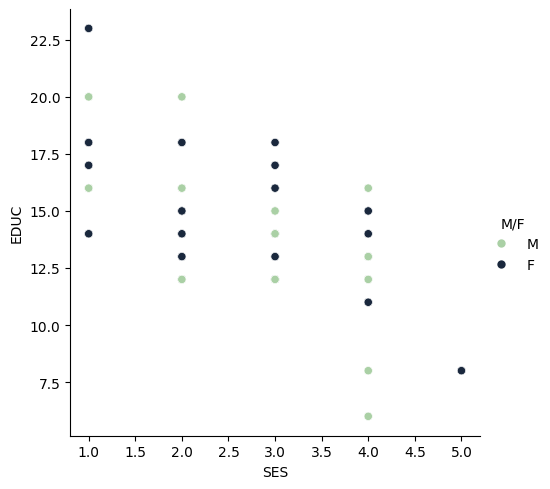

In [113]:
sns.relplot(x="SES", y="EDUC", hue="M/F", palette="ch:r=-.5,l=.75", data=df_dementia1);

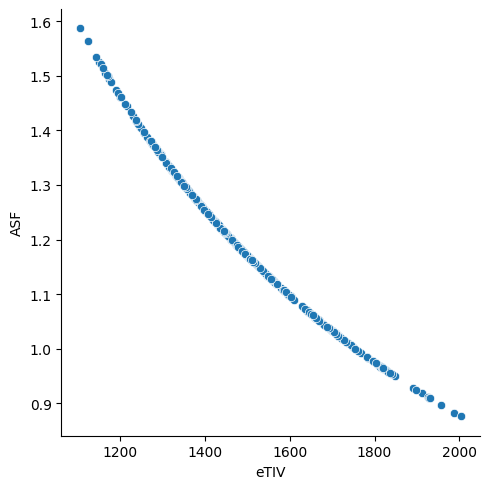

In [114]:
sns.relplot(x="eTIV", y="ASF", palette="ch:r=-.5,l=.75", data=df_dementia1);

<Axes: title={'center': 'Stacked bar plot'}, xlabel='Group'>

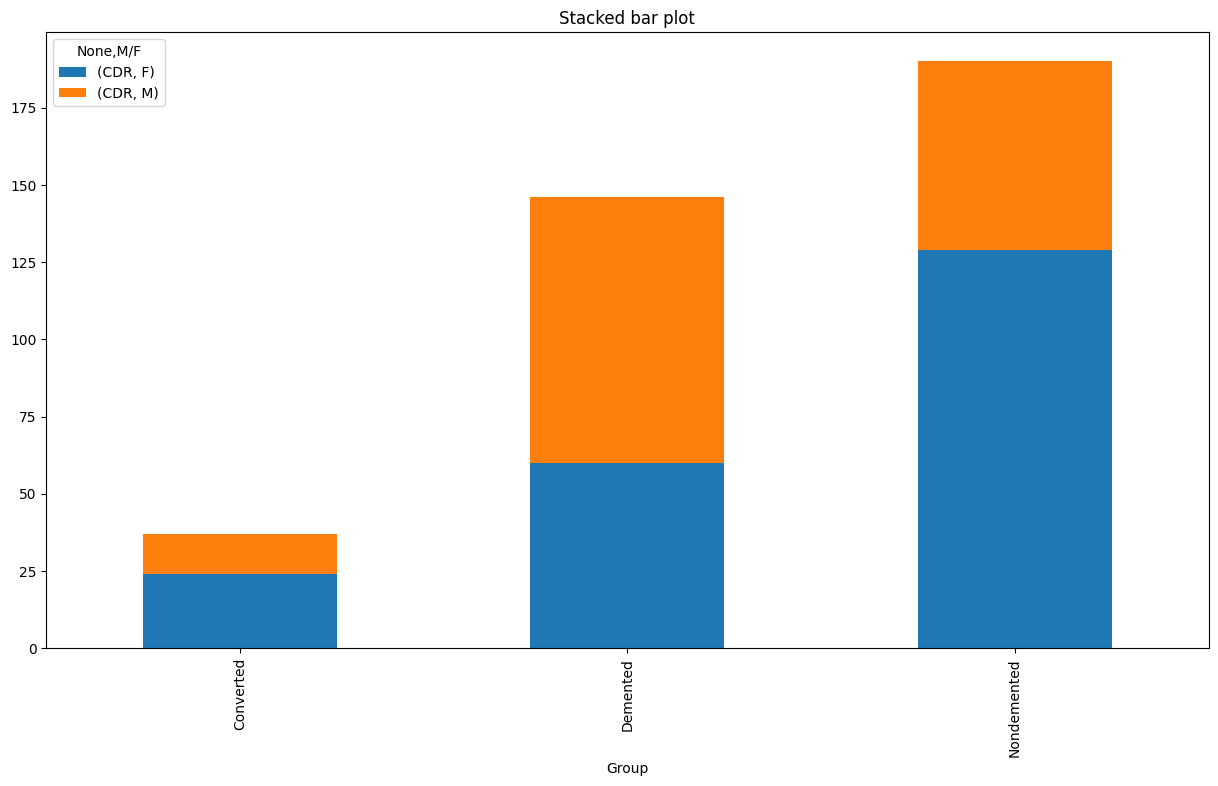

In [115]:
stack=pd.pivot_table(df_dementia1,index=['Group'],columns=['M/F'],values=['CDR'],aggfunc='count')
stack.plot.bar(title='Stacked bar plot',stacked=True)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>Men are more likely to be prone to Dementia</b>

In [116]:
df_dementia.drop(["Visit","MR Delay"],axis=1,inplace=True)

In [117]:
df_dementia["Group"].replace({"Nondemented":0,"Demented":1},inplace=True)

In [118]:
df_dementia["M/F"].replace({"M":0,"F":1},inplace=True)

In [119]:
df_dementia.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,age_group
0,0,0,87,14,2.000000,Normal,Normal,1987,0.696000,0.883000,80-90
1,0,0,88,14,2.000000,Normal,Normal,2004,0.681000,0.876000,80-90
2,1,0,75,12,2.000000,Mild,Dementia,1678,0.736000,1.046000,70-80
3,1,0,76,12,2.000000,Normal,Dementia,1738,0.713000,1.010000,70-80
4,1,0,80,12,2.000000,Mild,Dementia,1698,0.701000,1.034000,70-80


# Encoding Categorical variables

In [120]:
df_cat=df_dementia[["MMSE","CDR"]]

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
encode=LabelEncoder()
df_cat["MMSE"]=encode.fit_transform(df_cat[["MMSE"]])
df_cat["CDR"]=encode.fit_transform(df_cat[["CDR"]])

In [123]:
df_dementia.drop(["MMSE","CDR"],axis=1,inplace=True)

In [124]:
df=pd.concat([df_dementia,df_cat],axis=1)

In [ ]:
df

In [126]:
df.drop(["age_group"],axis=1,inplace=True)

In [127]:
df.head(5)

,Group,M/F,Age,EDUC,SES,eTIV,nWBV,ASF,MMSE,CDR
0,0,0,87,14,2.000000,1987,0.696000,0.883000,2,1
1,0,0,88,14,2.000000,2004,0.681000,0.876000,2,1
2,1,0,75,12,2.000000,1678,0.736000,1.046000,0,0
3,1,0,76,12,2.000000,1738,0.713000,1.010000,2,0
4,1,0,80,12,2.000000,1698,0.701000,1.034000,0,0


In [128]:
df["Group"].replace({"Converted":1},inplace=True)

In [129]:
df["Group"].unique()

array([0, 1])

In [374]:
df['CDR'].unique()

array([1, 0])

In [375]:
df['MMSE'].unique()

array([2, 0, 1, 3])

In [130]:
def scrore1(y_pred,y_test):
    cm = confusion_matrix(y_pred,y_test)
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    acc = (TN+TP)/(TN+FP+TP+FN)
    print("accuracy:",acc)
    precision = TP / (TP+FP)
    print("precision:",precision)
    recall = TP / (TP+FN)
    print("recall:",recall)
    f1_score = 2*((precision*recall)/(precision+recall))
    print("f1-score:",f1_score)

In [131]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap ="winter", cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})


    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [132]:
def plot_roc(model):

    y_pred_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')


    plt.title('ROC curve for dementia detection', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    # plot the grid
    plt.grid(True)

In [133]:
def get_train_report(model):
    
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [134]:
def get_test_report(model):
    
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [177]:
def update_score_card(algorithm_name, model):
    global score_card
    
    # Create a new row as a DataFrame
    new_row = pd.DataFrame({
        'Model_Name': [algorithm_name],
        'Accuracy': [acc],
        'AUC Score': [metrics.roc_auc_score(y_test, y_pred)],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1_score]
    })
    
    # Concatenate the new row with the existing score_card
    score_card = pd.concat([score_card, new_row], ignore_index=True)
    
    return score_card

# Building model 


### <span style="color:Red;font-size:1.4em;"><b>LOGISTIC REGRESSION</b></span> 

In [178]:
df["Group"].value_counts()

Group
0    190
1    183
Name: count, dtype: int64

<b>The dataset is balanced</b>

In [179]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

In [180]:
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.132015
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            9
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.8081
Time:                        21:12:43   Log-Likelihood:                -34.456
converged:                       True   LL-Null:                       -179.51
Covariance Type:            nonrobust   LLR p-value:                 3.258e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0813     46.743      1.799      0.072      -7.533     175.696
M/F           -0.2738      1.293     -0.212      0.832      -2.808       2.261
Age           -0.0119      0.057     -0.209      0.834      -0.123       0.100
EDUC           0.0078      0.169      0.046      0.963      -0.324       0.339
SES           -0.7080      0.446     -1.586      0.113      -1.583       0.167
eTIV          -0.0277      0.016     -1.720      0.085      -0.059       0.004
nWBV          -3.0446     12.926     -0.236      0.814     -28.378      22.289
ASF          -25.4371     18.967     -1.341      0.180     -62.611      11.737
MMSE          -1.3383      2.307     -0.580      0.562      -5.860       3.184
CDR           -8.4055      1.524     -5.515      0.000     -11.392      -5.419
==============================================================================
"""

In [181]:
y_pred=logreg.predict(X_test)

In [182]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [183]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

### Classification Report

In [184]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        46
           1       1.00      0.85      0.92        66

    accuracy                           0.91       112
   macro avg       0.91      0.92      0.91       112
weighted avg       0.93      0.91      0.91       112



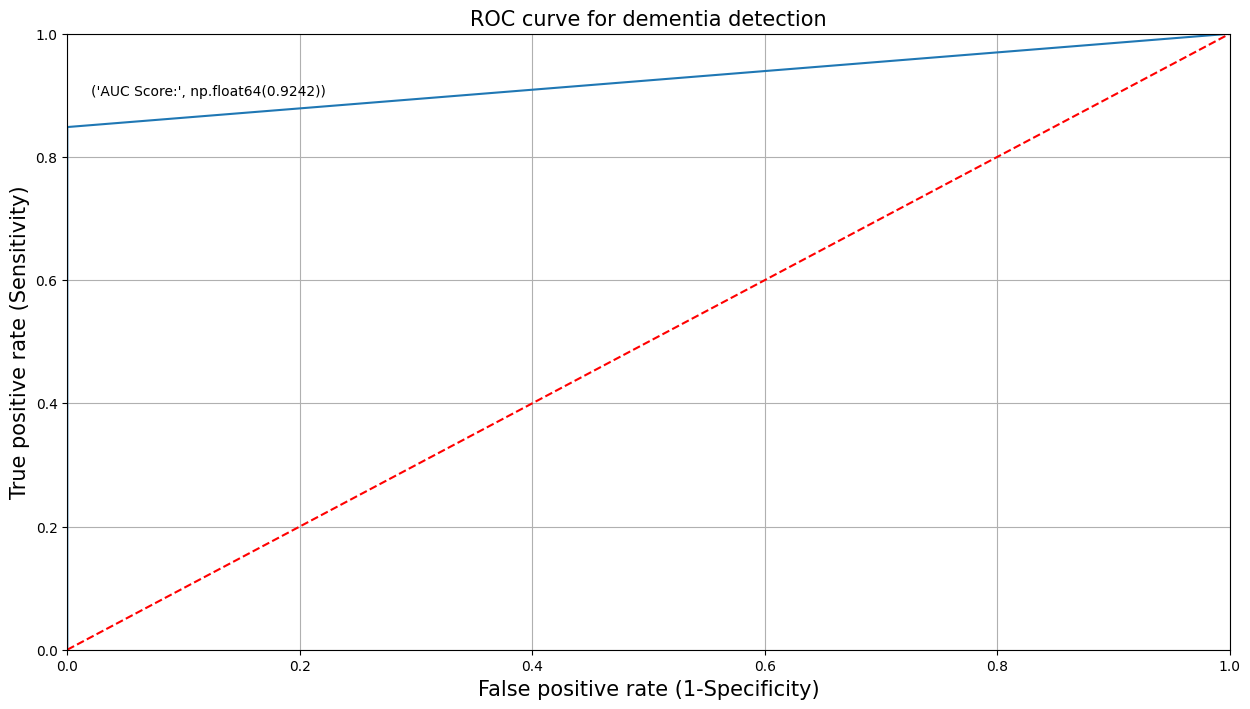

In [185]:
plot_roc(logreg)

In [186]:
update_score_card(algorithm_name = 'Logistic Regression', model = logreg)
score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Logistic Regression is 92.8% and the model seems to be performing well for our dataset</b>

### <span style="color:Red;font-size:1.4em;"><b>Improving the model by considering only significant variables </b></span> 

In [187]:
x=logreg.pvalues
x

const   0.072050
M/F     0.832320
Age     0.834233
EDUC    0.963390
SES     0.112758
eTIV    0.085435
nWBV    0.813782
ASF     0.179879
MMSE    0.561884
CDR     0.000000
dtype: float64

In [188]:
sig_var=x[logreg.pvalues<0.05]
sig_var

CDR   0.000000
dtype: float64

In [189]:
imp_var=df[["M/F","SES","eTIV","ASF","CDR"]]


In [190]:
X=imp_var
y=df["Group"]
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.161535
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      255
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.7669
Time:                        21:12:44   Log-Likelihood:                -42.161
converged:                       True   LL-Null:                       -180.86
Covariance Type:            nonrobust   LLR p-value:                 7.183e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3272     45.715      2.195      0.028      10.728     189.926
M/F           -1.3824      0.880     -1.572      0.116      -3.106       0.342
SES           -0.8216      0.337     -2.440      0.015      -1.482      -0.162
eTIV          -0.0348      0.016     -2.223      0.026      -0.066      -0.004
ASF          -33.0968     17.808     -1.858      0.063     -68.001       1.807
CDR           -9.0980      1.784     -5.100      0.000     -12.595      -5.601
==============================================================================
"""

In [191]:
y_pred=logreg.predict(X_test)

In [192]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [193]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

### Classification Report

In [194]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        57
           1       0.98      0.91      0.94        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



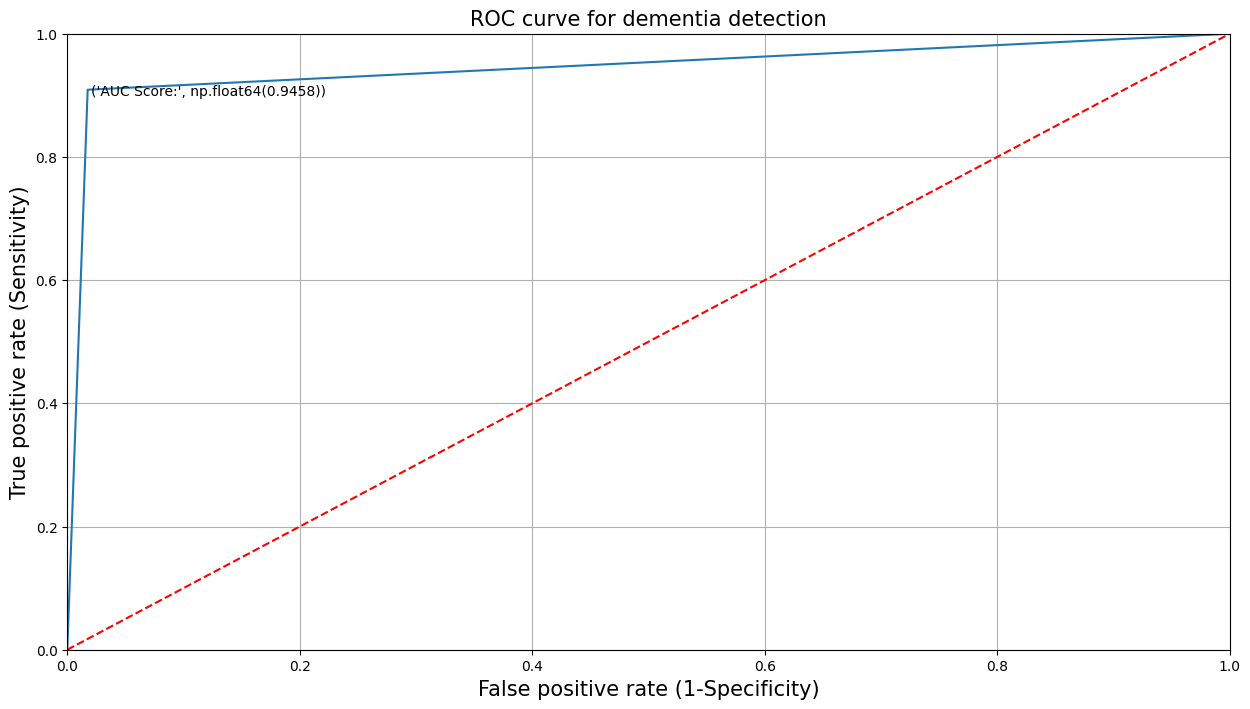

In [195]:
plot_roc(logreg)

In [196]:
update_score_card(algorithm_name = 'Logistic Regression -Significant Variables', model = logreg)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Logistic Regression - Significant Variables has improved the model performance which is indicative from the accuracy value of 93.7%</b>

### <span style="color:Red;font-size:1.4em;"><b>Feature selection using RFE</b></span> 

In [197]:
from sklearn.feature_selection import RFE

In [198]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

linreg_rfe = LogisticRegression()

rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 6)

rfe_model = rfe_model.fit(X_train, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['M/F', 'EDUC', 'SES', 'ASF', 'MMSE', 'CDR'], dtype='object')


In [199]:
X2=df[['EDUC', 'SES', 'nWBV', 'ASF', 'MMSE', 'CDR']]
y2=df["Group"]
X2=sm.add_constant(X2)


In [200]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3)

In [201]:

logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.162695
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            6
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.7653
Time:                        21:12:44   Log-Likelihood:                -42.463
converged:                       True   LL-Null:                       -180.91
Covariance Type:            nonrobust   LLR p-value:                 7.269e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5082     10.719      1.353      0.176      -6.501      35.517
EDUC          -0.2114      0.156     -1.355      0.175      -0.517       0.094
SES           -0.8131      0.398     -2.041      0.041      -1.594      -0.032
nWBV          -9.2164      8.903     -1.035      0.301     -26.665       8.233
ASF            4.6780      2.318      2.018      0.044       0.135       9.221
MMSE          -1.7482      3.893     -0.449      0.653      -9.379       5.882
CDR           -7.3414      1.168     -6.288      0.000      -9.630      -5.053
==============================================================================
"""

In [202]:
y_pred=logreg.predict(X_test)

In [203]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [204]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

### Classification Report

In [205]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.98      0.88      0.93        52

    accuracy                           0.94       112
   macro avg       0.94      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112



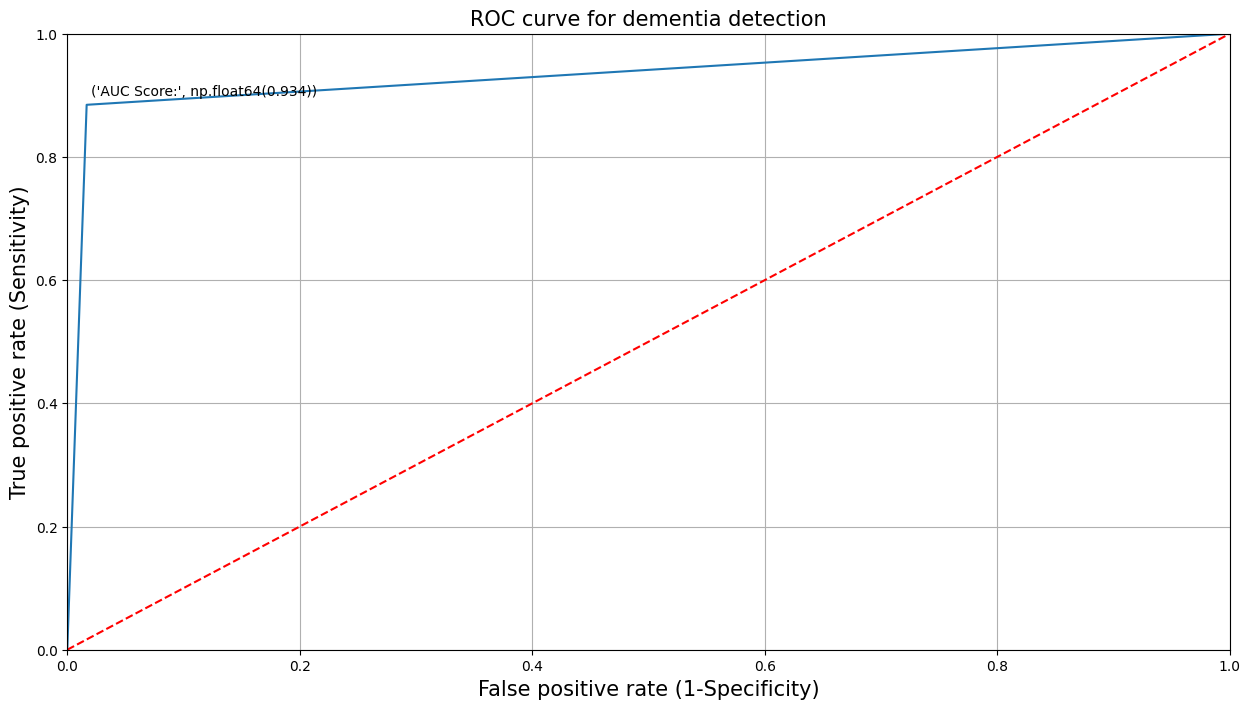

In [206]:
plot_roc(logreg)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy is 96%.This model with feature selection performs better than the previous models</b>

In [207]:
correct=(TN+TP)/(TN+TP+FP+FN)
print("Correctly classified :",correct*100)

Correctly classified : 93.75


In [208]:
in_correct=(FN+FP)/(TN+TP+FP+FN)
print("In_Correctly classified :",in_correct*100)

In_Correctly classified : 6.25


In [209]:
update_score_card(algorithm_name = 'Logistic Regression -RFE', model = logreg)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Logistic Regression - RFE is reduced to 51%.</b>

### <span style="color:Red;font-size:1.4em;"><b>Naive Bayes Classifier</b></span> 

In [210]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [211]:
y_pred=gnb_model.predict(X_test)

In [212]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

## Classification Report

In [213]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.98      0.88      0.93        52

    accuracy                           0.94       112
   macro avg       0.94      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112



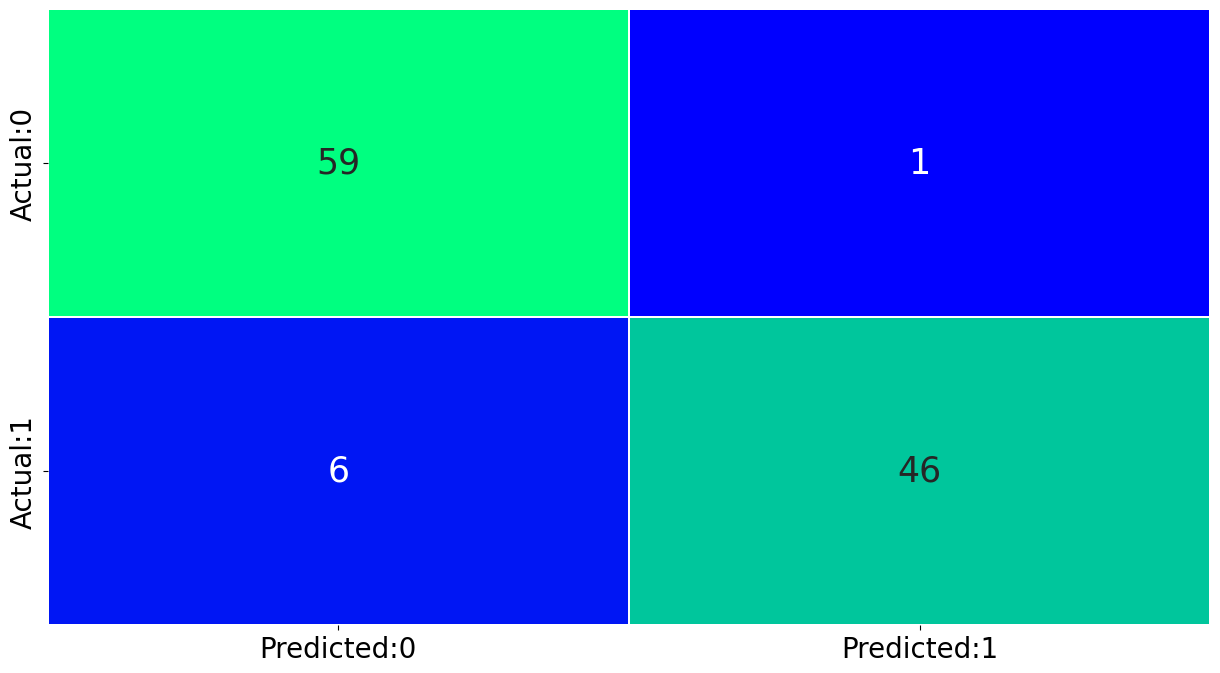

In [214]:
plot_confusion_matrix(gnb_model)

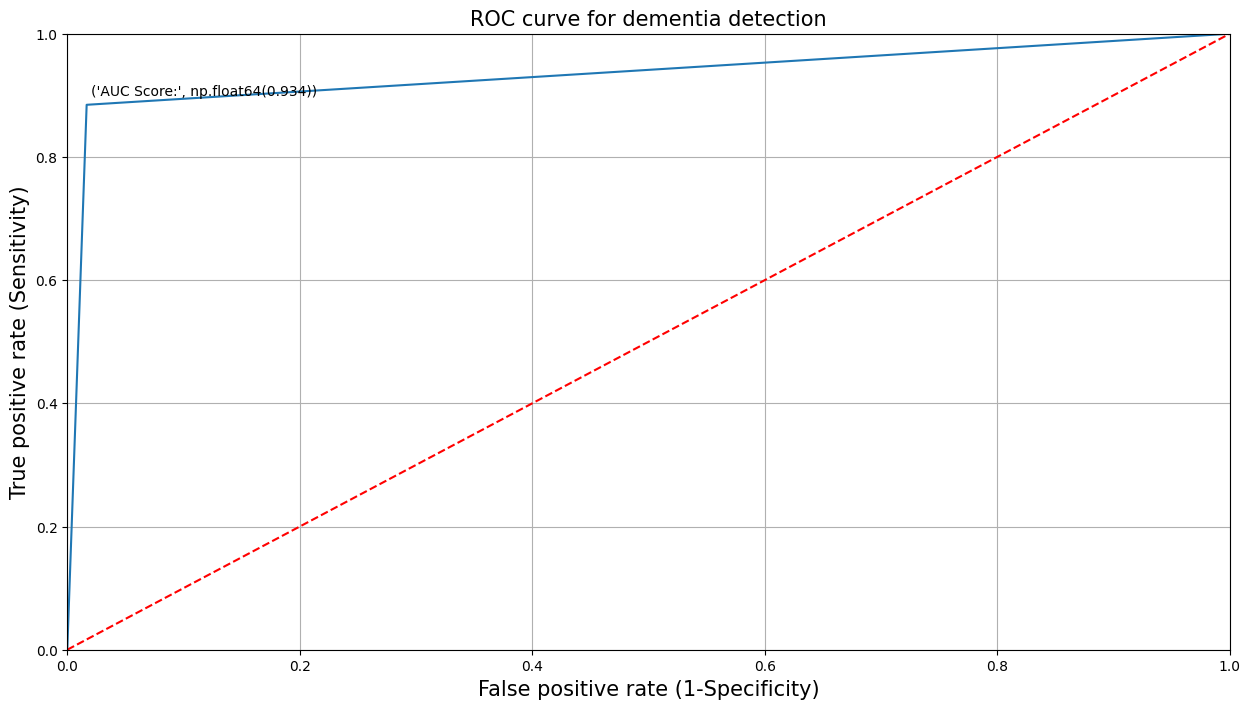

In [215]:

plot_roc(gnb_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.93.</b>

In [216]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [217]:
update_score_card(algorithm_name = 'Naive Bayes', model = gnb_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Naive Bayes is 93% but the precision is 100%.</b>

### <span style="color:Red;font-size:1.4em;"><b>KNearest Neighbour Classifier</b></span> 

In [218]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

In [219]:
y_pred=knn_model.predict(X_test)

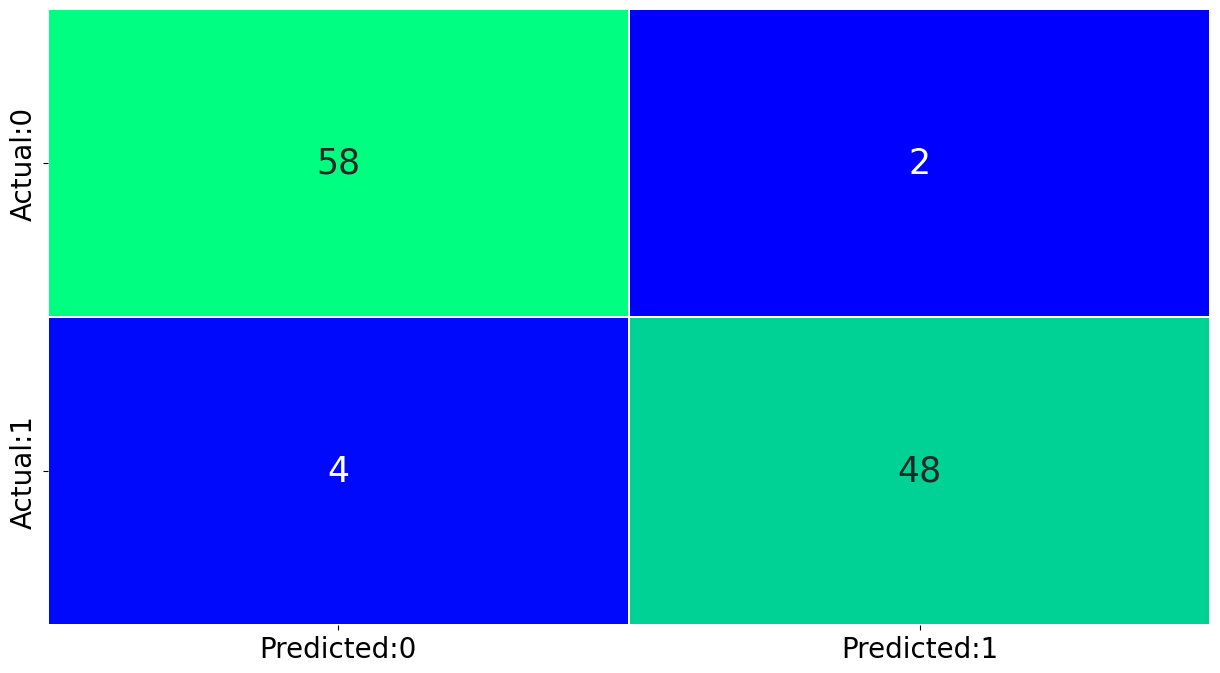

In [220]:
plot_confusion_matrix(knn_model)

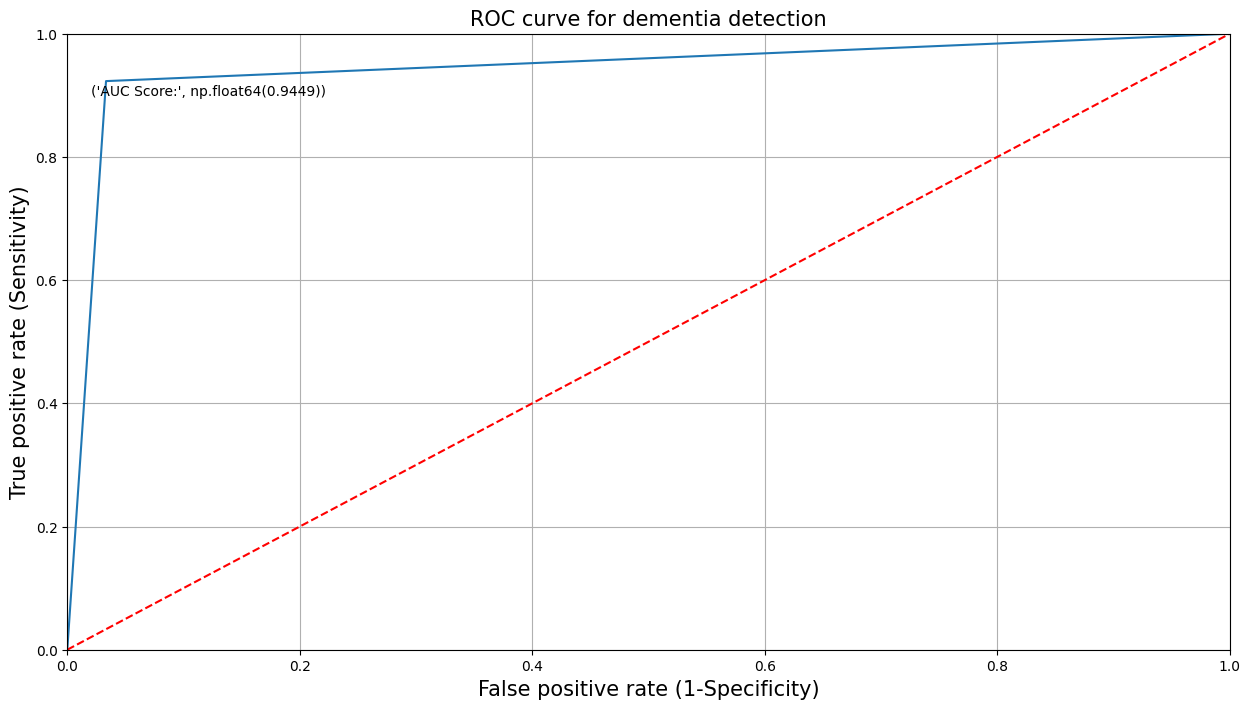

In [221]:
plot_roc(knn_model)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The AUC Score is 0.93.</b>

In [222]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [223]:
update_score_card(algorithm_name = 'KNN ', model = knn_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for KNN is 93% but the precision is 94%.</b>

### <span style="color:Red;font-size:1.4em;"><b>Hyper-parameter tuning using KNN classifier</b></span> 

In [224]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean']}
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': np.int64(1)} 



In [225]:
y_pred=knn_grid.predict(X_test)

In [226]:
print("The accuracy is :",accuracy_score(y_test,y_pred))

The accuracy is : 0.9464285714285714


In [227]:
update_score_card(algorithm_name = 'knn-hyperparameter tuning', model = knn_grid)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820
5,knn-hyperparameter tuning,0.946429,0.946154,0.966667,0.935484,0.950820


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for KNN - Hyperparameter tuning is 93% but the precision is 94%.</b>

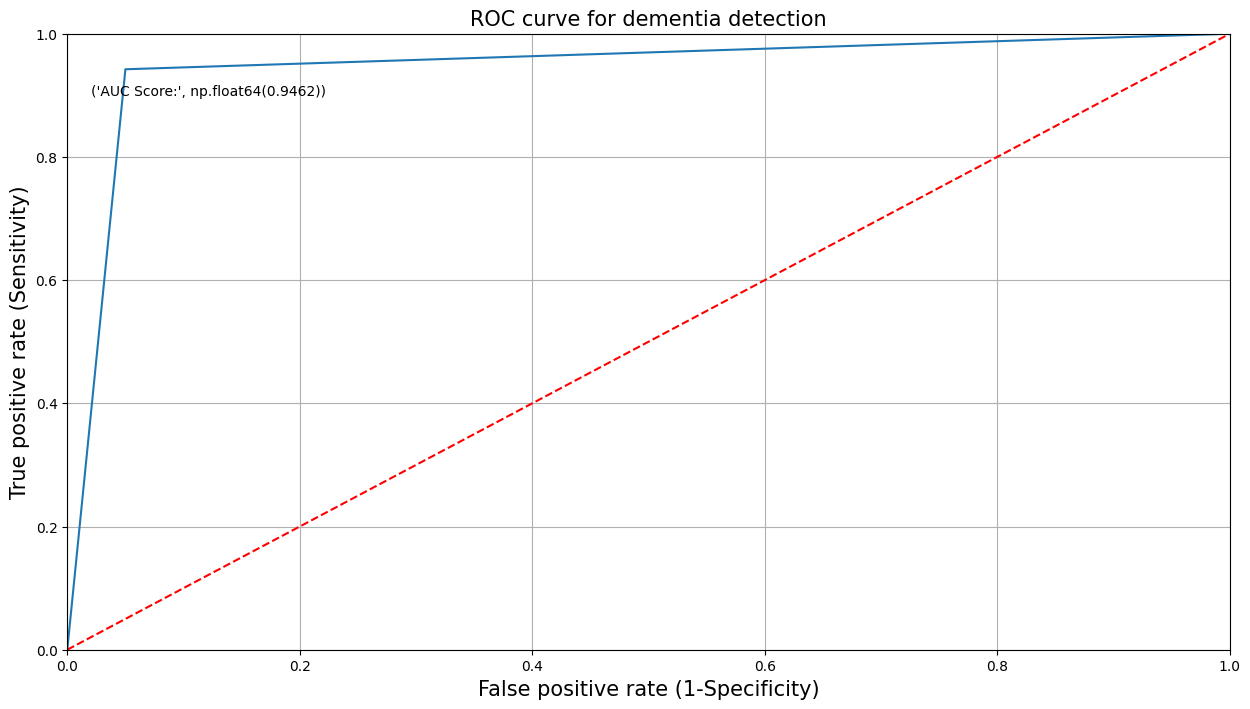

In [228]:
plot_roc(knn_grid)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.98.</b>


### <span style="color:Red;font-size:1.4em;"><b> DecisionTree classifier</b></span> 

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image  

In [231]:
X1=df.drop(["Group"],axis=1)
y1=df["Group"]

In [232]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=10)


In [233]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini',splitter='best',max_depth=3, random_state = 10)
dtree = decision_tree_classification.fit(X_train, y_train)

In [234]:
labels = X_train.columns

dot_data = tree.export_graphviz(dtree, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [144]:
y_pred=dtree.predict(X_test)

In [145]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [146]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



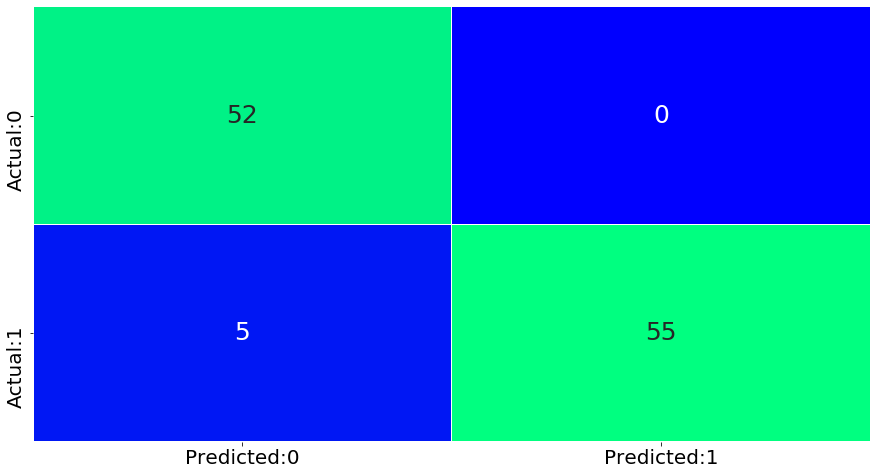

In [147]:
plot_confusion_matrix(dtree)

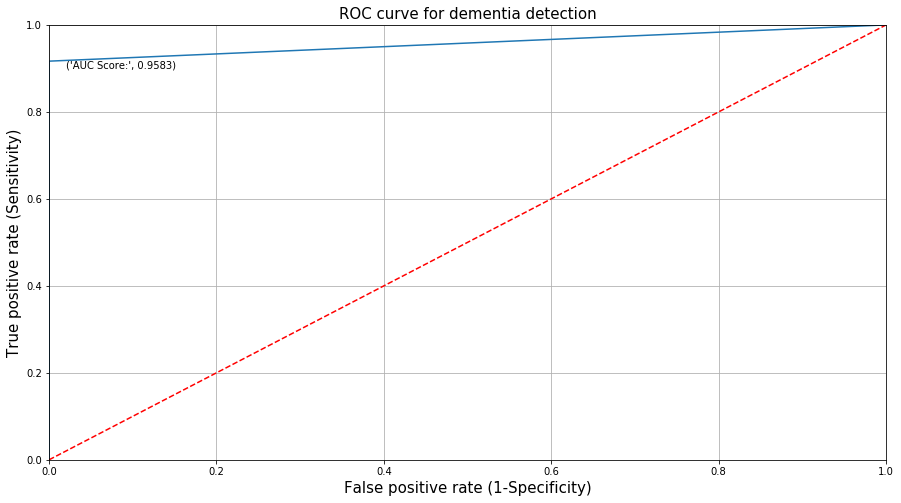

In [148]:
plot_roc(dtree)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.95.</b>

In [149]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [150]:
update_score_card(algorithm_name = 'Decision Tree ', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Decision Tree is 95% and the precision is 100%.</b>

### <span style="color:Red;font-size:1.4em;"><b> Hyperparameter tuning decision tree</b></span> 

In [235]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                  
                     'min_samples_split': range(2,10)
                    
                     }]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2} 



In [236]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),   
                                 min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

In [237]:
labels = X_train.columns

dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [329]:
y_pred=dt_model.predict(X_test)

In [330]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

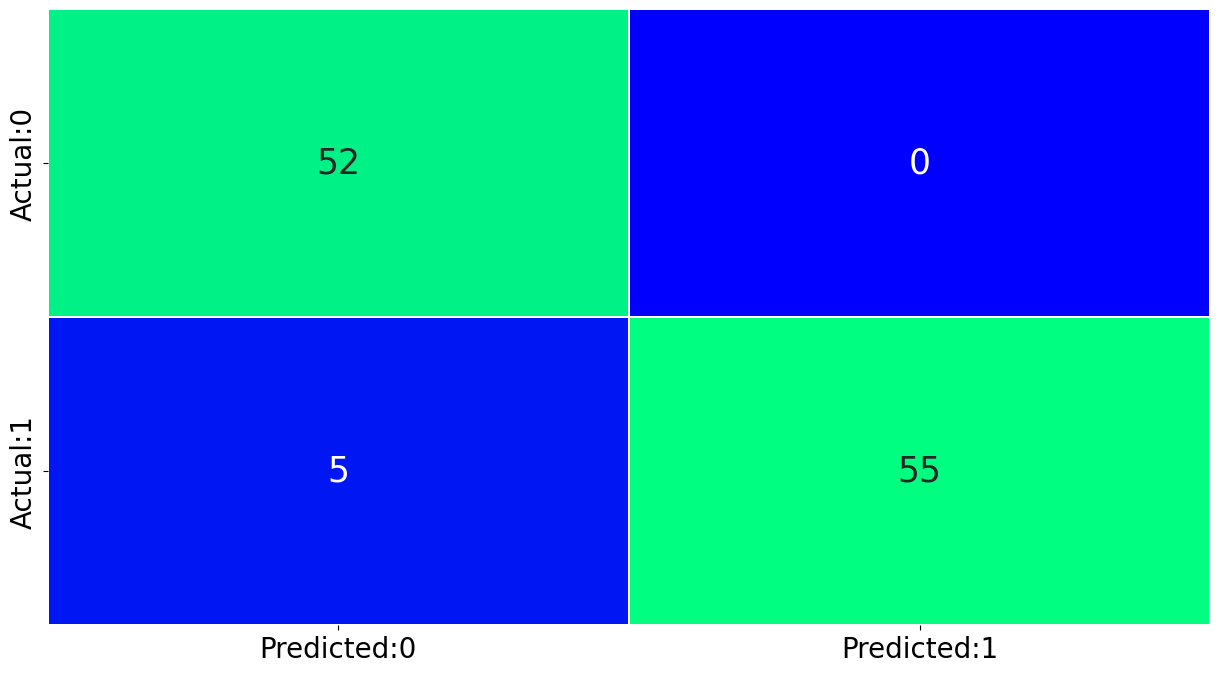

In [331]:
plot_confusion_matrix(dt_model)

In [332]:
update_score_card(algorithm_name = 'Decision Tree-hyperparameter tuning ', model = dt_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820
5,knn-hyperparameter tuning,0.946429,0.946154,0.966667,0.935484,0.950820
6,Decision Tree-hyperparameter tuning,0.946429,0.958333,0.966667,0.935484,0.950820
7,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
8,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963
9,ADA Boost,0.946429,0.947436,0.961538,0.925926,0.943396


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Decision Tree - Hyperparameter tuning is 95% and the precision is 100%.</b>

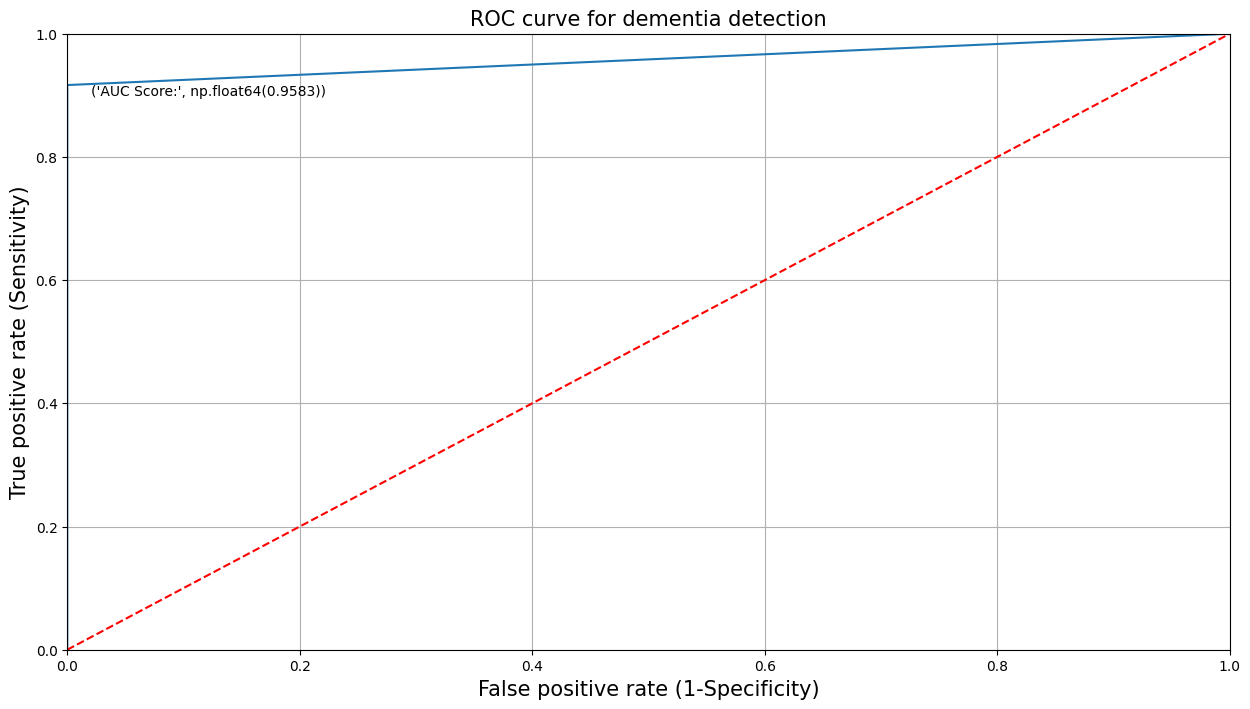

In [333]:
plot_roc(dt_model)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The AUC Score is 0.95.</b>

In [334]:
score=cross_val_score(dt_model,X_train,y_train,cv=10,scoring="accuracy")
score.mean()

np.float64(0.9425925925925925)


### <span style="color:Red;font-size:1.4em;"><b> Random Forest classifier</b></span> 

In [335]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [336]:
y_pred=rf_model.predict(X_test)

### Classification Report-Train_data

In [337]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.98      0.99       123

    accuracy                           0.99       261
   macro avg       0.99      0.99      0.99       261
weighted avg       0.99      0.99      0.99       261



### Classification Report-Test_data

In [338]:
test_report = get_test_report(rf_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.93      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



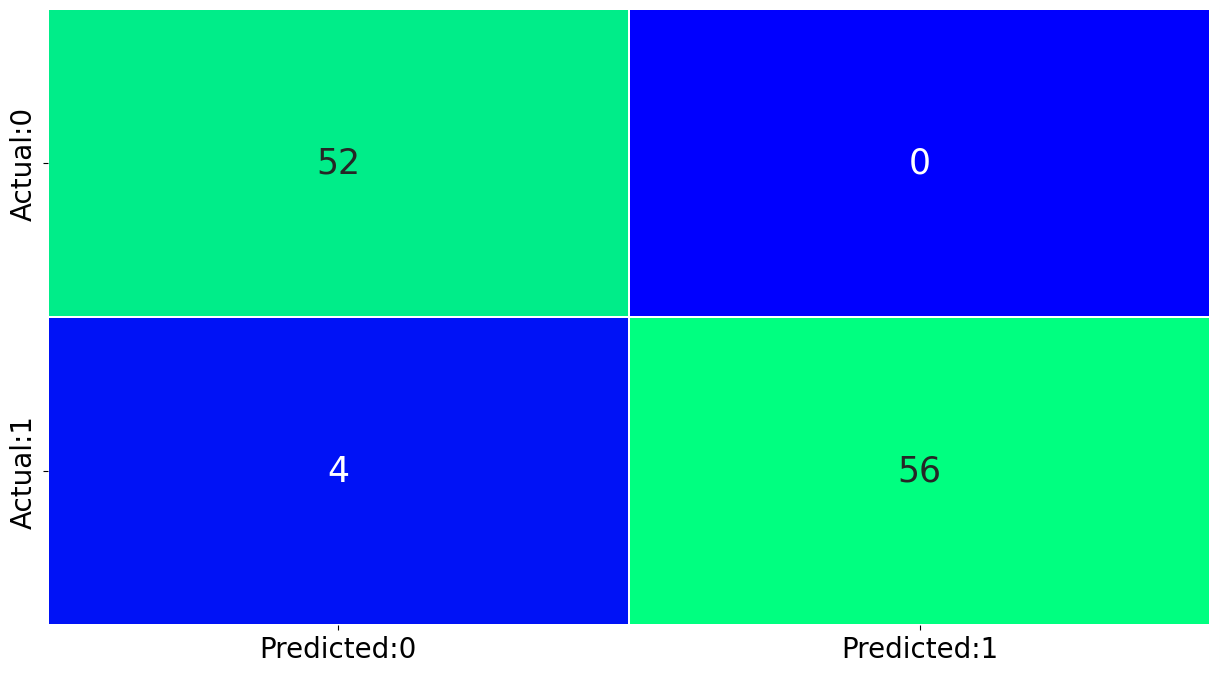

In [339]:
plot_confusion_matrix(rf_model)

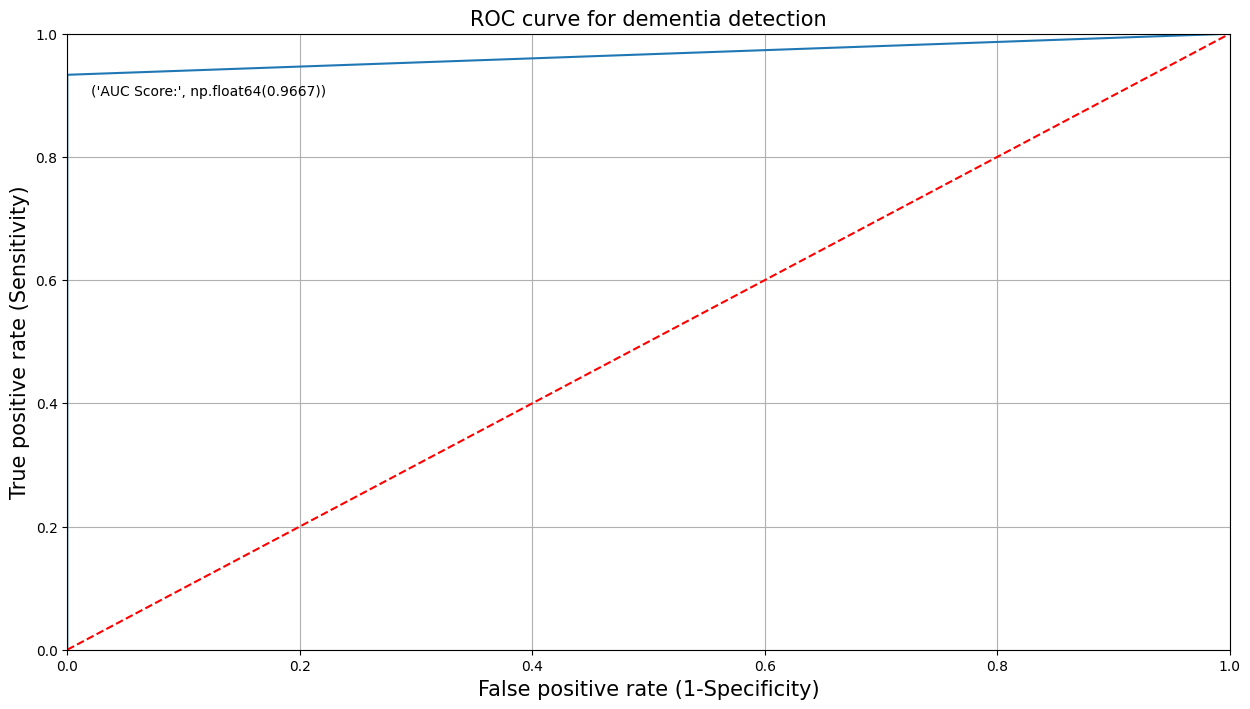

In [340]:
plot_roc(rf_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.96.</b>

In [341]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [342]:
update_score_card(algorithm_name = 'Random Forest', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820
5,knn-hyperparameter tuning,0.946429,0.946154,0.966667,0.935484,0.950820
6,Decision Tree-hyperparameter tuning,0.946429,0.958333,0.966667,0.935484,0.950820
7,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
8,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963
9,ADA Boost,0.946429,0.947436,0.961538,0.925926,0.943396


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Random Forest is 96% and the precision is 100%.</b>


### <span style="color:Red;font-size:1.4em;"><b> Random forest - with hyperparameter tuning </b></span> 

In [343]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')
 

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10} 



### Classification Report

In [344]:
# type your code here
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.95      0.97        60

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [345]:
print(len(X_train))
print(len(X_test))

261
112


In [376]:
y_pred = rf_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1])

In [377]:
X_test

,M/F,Age,EDUC,SES,eTIV,nWBV,ASF,MMSE,CDR
236,1,75,13,2.000000,1520,0.708000,1.155000,2,0
274,1,81,12,3.000000,1495,0.687000,1.174000,2,0
257,0,71,16,3.000000,1479,0.750000,1.187000,2,0
298,1,73,16,3.000000,1287,0.771000,1.364000,2,0
228,0,79,18,1.000000,1569,0.781000,1.118000,2,0
192,0,75,12,4.000000,1511,0.739000,1.162000,2,1
166,0,69,16,2.000000,1848,0.737000,0.950000,2,1
263,0,81,18,1.000000,1647,0.717000,1.066000,2,0
76,1,81,18,2.000000,1174,0.742000,1.495000,2,0
170,0,92,16,1.000000,1662,0.682000,1.056000,2,1


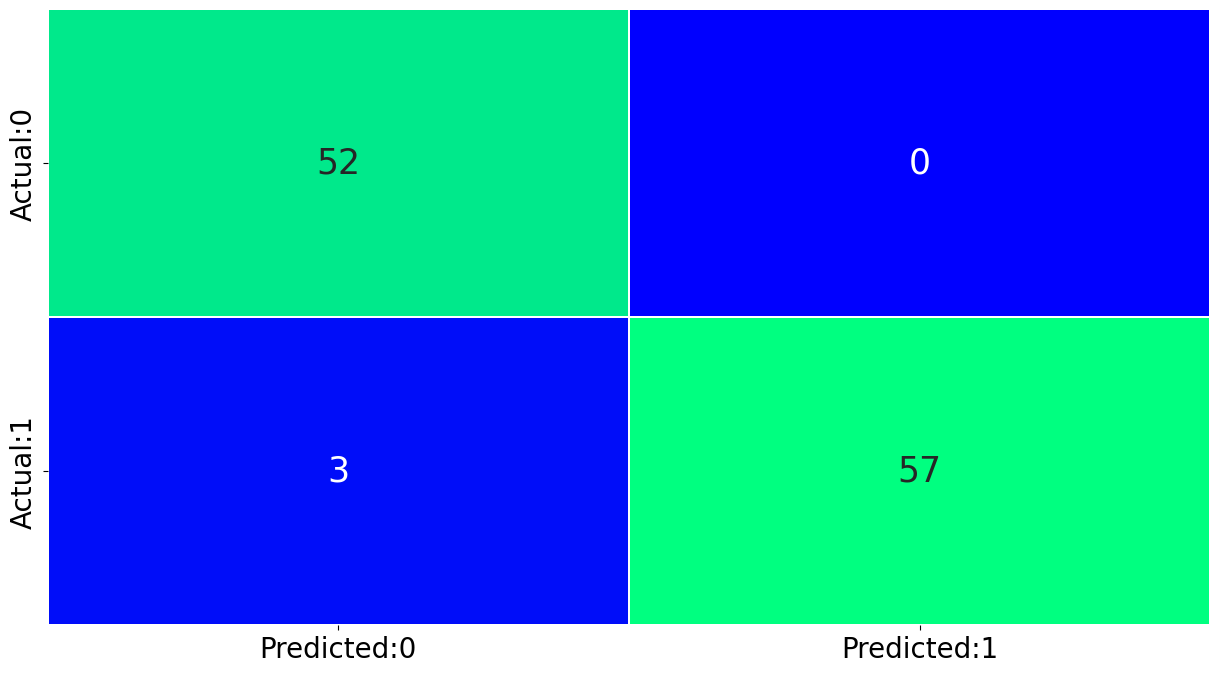

In [346]:
plot_confusion_matrix(rf_model)

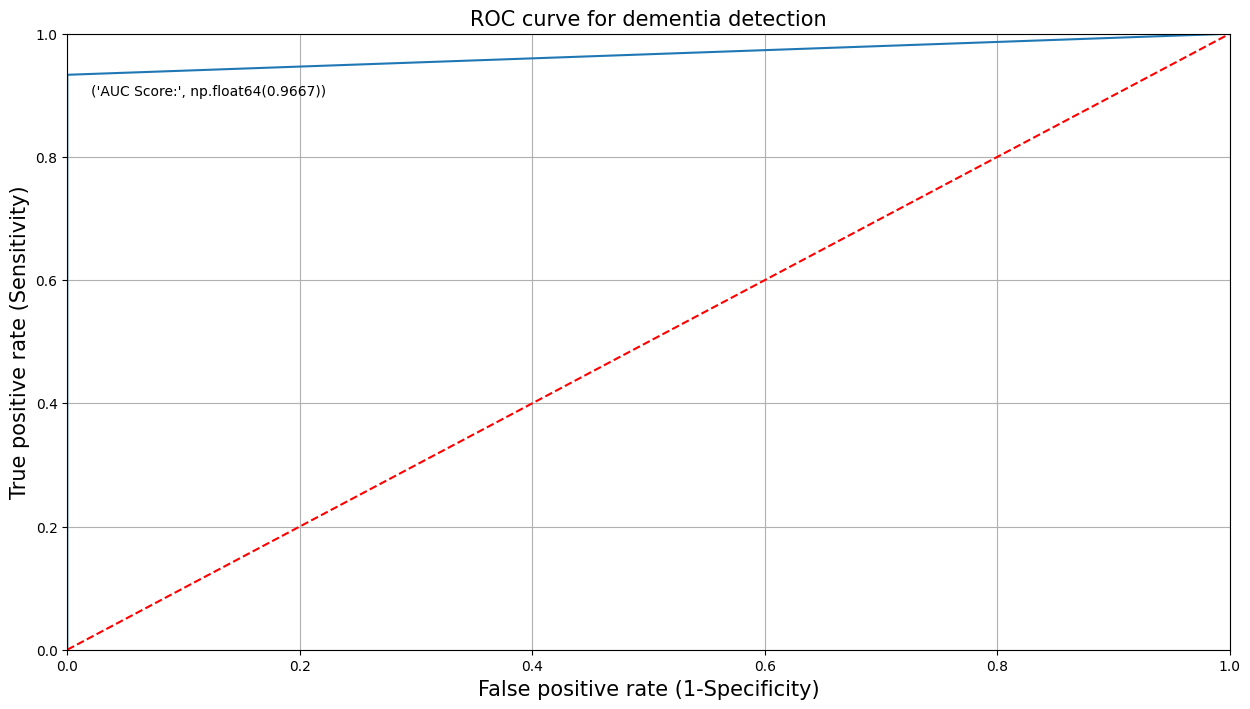

In [347]:
plot_roc(rf_model)

In [348]:
import pickle
import joblib

# Save using pickle
with open('finalized_model.sav', 'wb') as file:
    pickle.dump(rf_grid_model, file)

# Alternatively, save using joblib (recommended for large numpy arrays)
joblib.dump(rf_grid_model, 'random_forest_model.joblib')

# To verify the save, you can load and test the model:
# Using pickle
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

# Or using joblib
loaded_model_joblib = joblib.load('random_forest_model.joblib')

# Test the loaded model
print("Model accuracy:", loaded_model.score(X_test, y_test))

Model accuracy: 0.9732142857142857


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.96.</b>

In [349]:
update_score_card(algorithm_name = 'Random Forest-hyperparameter tuning', model = rf_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820
5,knn-hyperparameter tuning,0.946429,0.946154,0.966667,0.935484,0.950820
6,Decision Tree-hyperparameter tuning,0.946429,0.958333,0.966667,0.935484,0.950820
7,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
8,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963
9,ADA Boost,0.946429,0.947436,0.961538,0.925926,0.943396


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for Random Forest - hyperparameter tuning remains 96% and the precision is 100%.</b>



### <span style="color:Red;font-size:1.4em;"><b>  ADABOOST </b></span> 

In [350]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [351]:
y_pred=ada_model.predict(X_test)

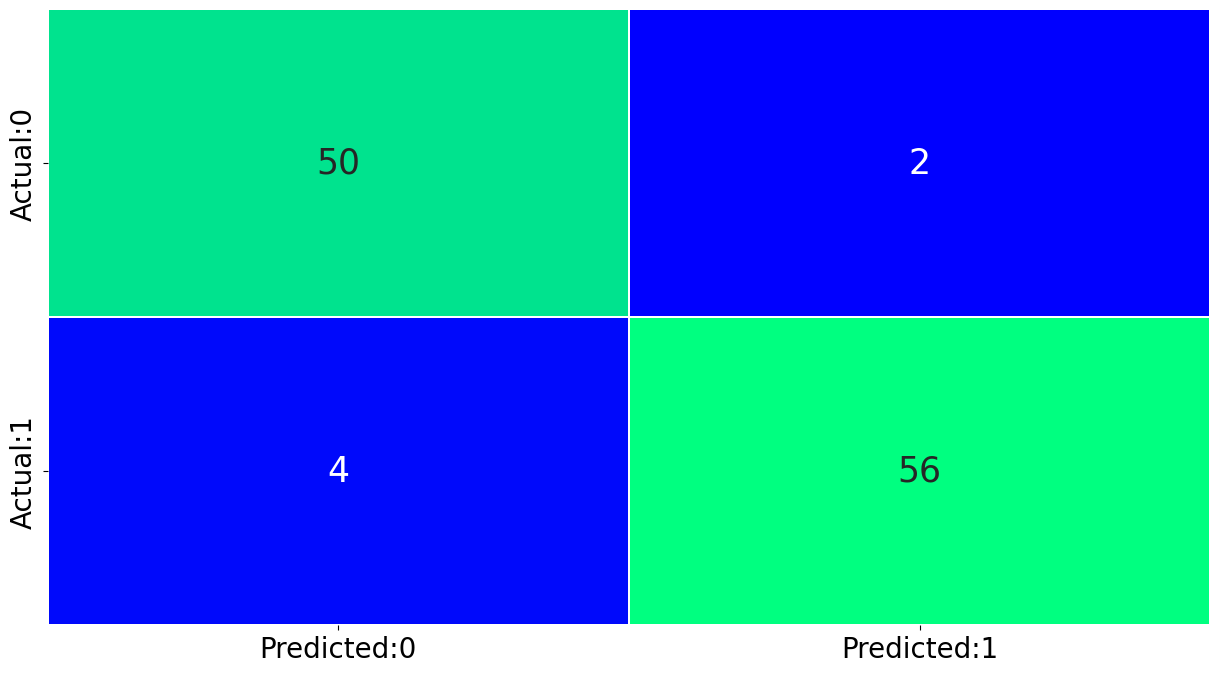

In [352]:
plot_confusion_matrix(ada_model)

### Classification Report

In [353]:
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.97      0.93      0.95        60

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



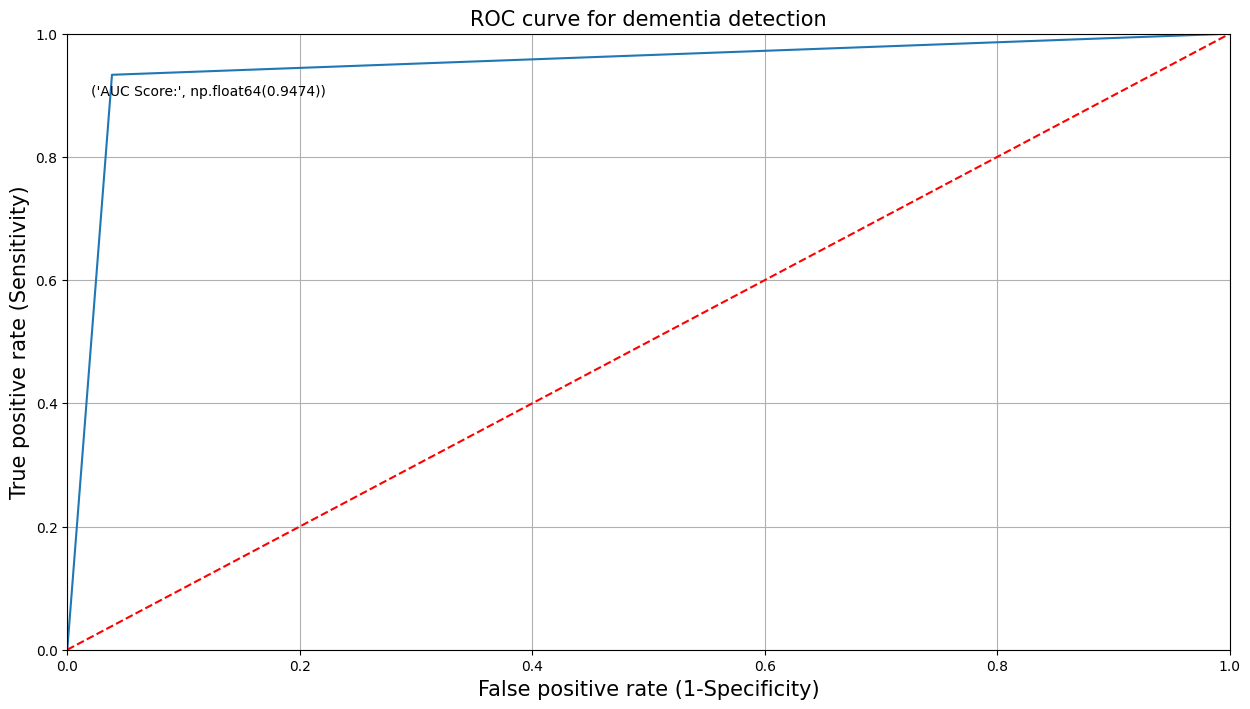

In [354]:
plot_roc(ada_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.88.</b>

In [355]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [356]:
update_score_card(algorithm_name = 'ADA Boost', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820
5,knn-hyperparameter tuning,0.946429,0.946154,0.966667,0.935484,0.950820
6,Decision Tree-hyperparameter tuning,0.946429,0.958333,0.966667,0.935484,0.950820
7,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
8,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963
9,ADA Boost,0.946429,0.947436,0.961538,0.925926,0.943396


<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The Accuracy for ADA Boost is 88% and the precision is 90%.</b>


### <span style="color:Red;font-size:1.4em;"><b>  Gradient Boosting </b></span> 

In [357]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [358]:
y_pred=gboost_model.predict(X_test)

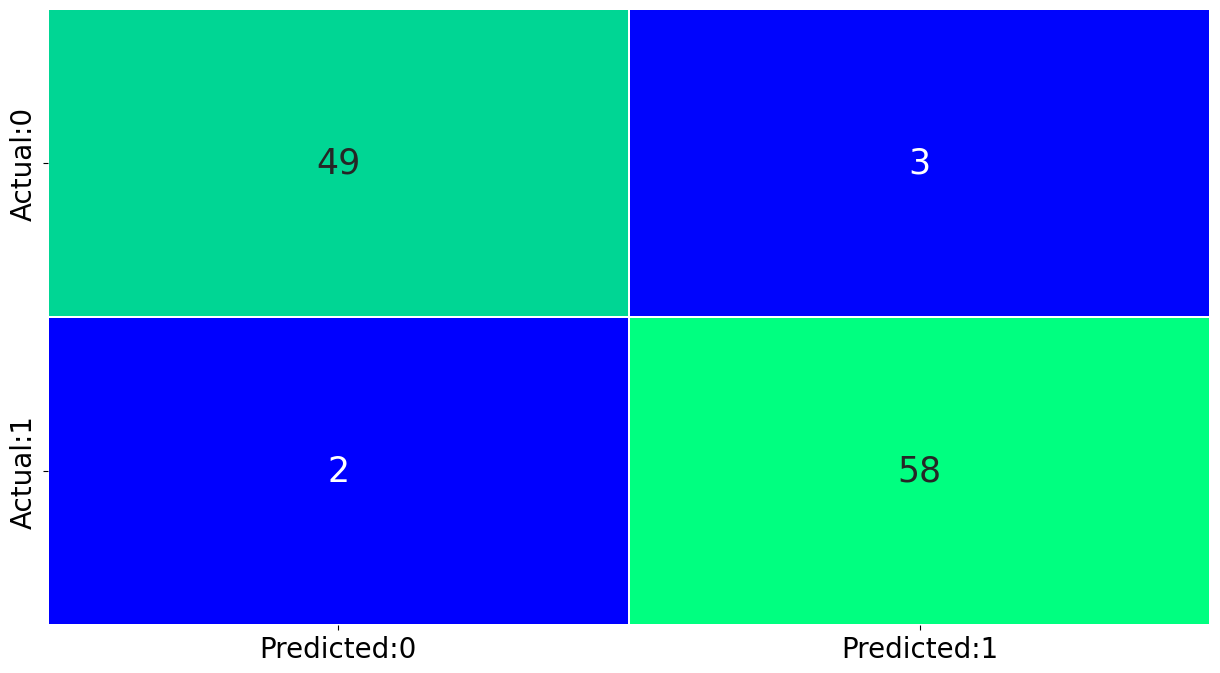

In [359]:
plot_confusion_matrix(gboost_model)

### Classification Report

In [360]:
test_report = get_test_report(gboost_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.95      0.97      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



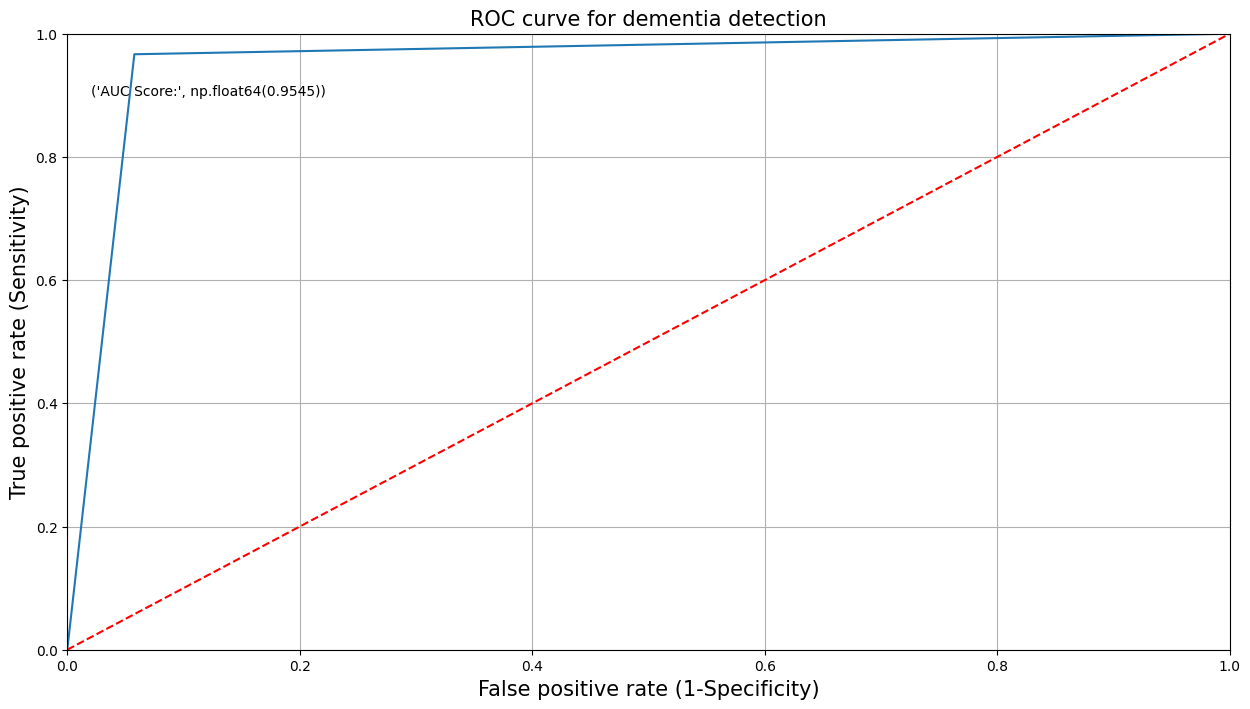

In [361]:
plot_roc(gboost_model)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The AUC Score is 0.89.</b>

In [362]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [363]:
update_score_card(algorithm_name = 'Gradient Boosting', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820
5,knn-hyperparameter tuning,0.946429,0.946154,0.966667,0.935484,0.950820
6,Decision Tree-hyperparameter tuning,0.946429,0.958333,0.966667,0.935484,0.950820
7,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
8,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963
9,ADA Boost,0.946429,0.947436,0.961538,0.925926,0.943396


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for Gradient Boosting is 89% but the precision is 88%.</b>


### <span style="color:Red;font-size:1.4em;"><b>  XGBOOST </b></span> 

In [364]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [365]:
y_pred=xgb_model.predict(X_test)

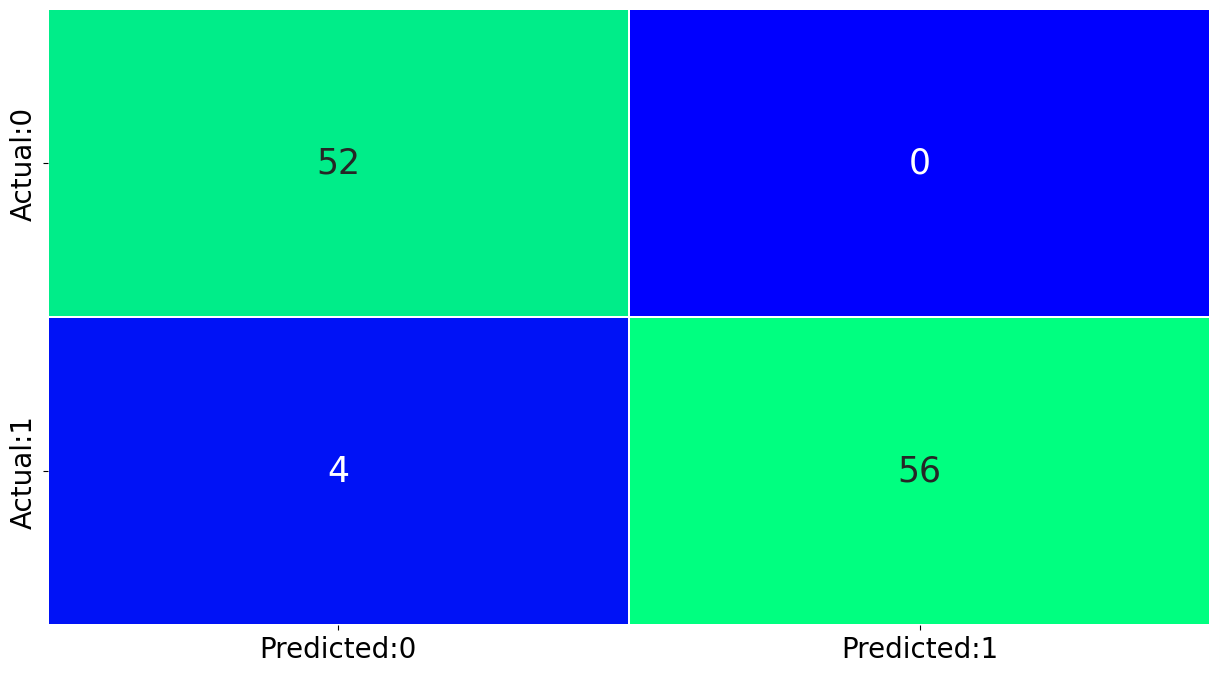

In [366]:

plot_confusion_matrix(xgb_model)

### Classification Report

In [367]:
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.93      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



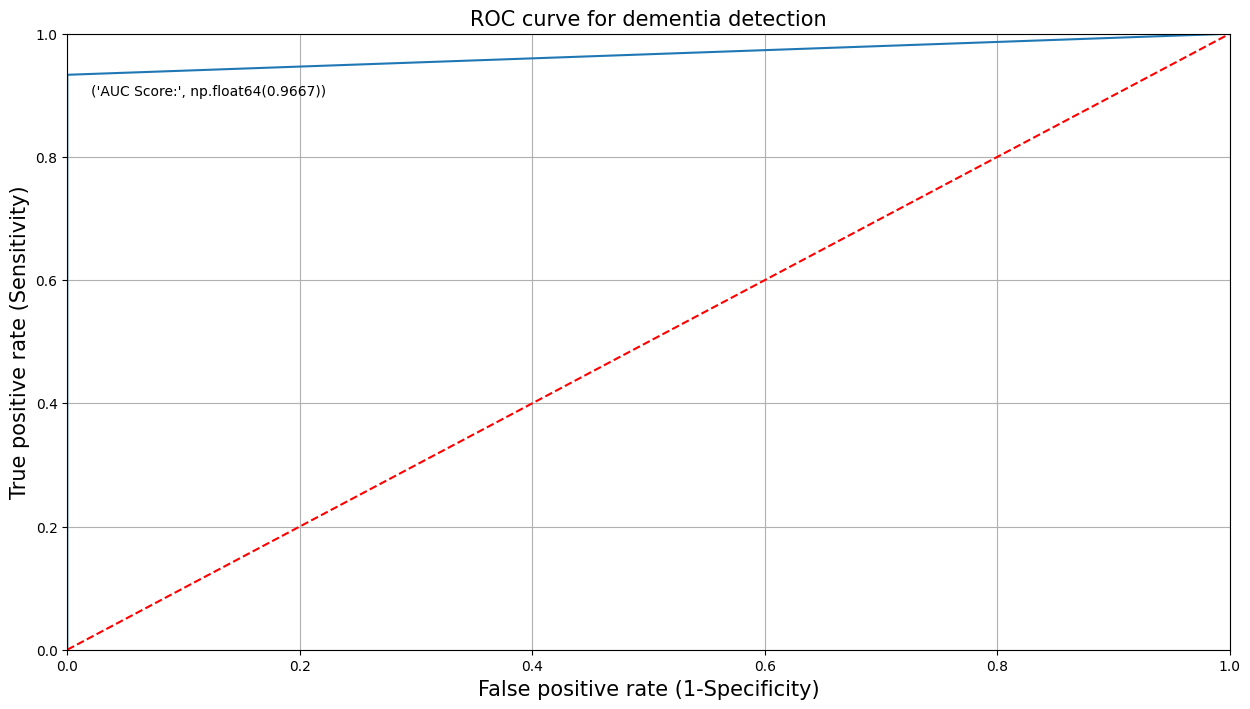

In [368]:
plot_roc(xgb_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.93.</b>

In [369]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [370]:
update_score_card(algorithm_name = 'XG Boost', model = dtree)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.910714,0.924242,1.000000,0.821429,0.901961
1,Logistic Regression -Significant Variables,0.946429,0.945774,0.982456,0.918033,0.949153
2,Logistic Regression -RFE,0.937500,0.933974,0.983333,0.907692,0.944000
3,Naive Bayes,0.937500,0.933974,0.983333,0.907692,0.944000
4,KNN,0.946429,0.944872,0.966667,0.935484,0.950820
5,knn-hyperparameter tuning,0.946429,0.946154,0.966667,0.935484,0.950820
6,Decision Tree-hyperparameter tuning,0.946429,0.958333,0.966667,0.935484,0.950820
7,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
8,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963
9,ADA Boost,0.946429,0.947436,0.961538,0.925926,0.943396


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for XG Boost is 94% and the precision is 100%.</b>


### <span style="color:Red;font-size:1.4em;"><b>   Tuning hyperparamenters using XGBoost </b></span> 

In [371]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create the XGBoost model with updated parameters
xgb_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,  # Add this parameter
    eval_metric='logloss'     # Add this parameter
)

# Define parameters for tuning
tuning_parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 0.9, 1.0]
}

# Create GridSearchCV object
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=tuning_parameters,
    cv=3,
    scoring='roc_auc'
)

# Fit the model
xgb_grid.fit(X_train, y_train)

# Print best parameters
print('Best parameters for XGBoost classifier:', xgb_grid.best_params_, '\n')

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [283]:
import sklearn
import xgboost
print(f"scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgboost.__version__}")

scikit-learn version: 1.6.0
XGBoost version: 2.1.3


In [195]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.98      0.95      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.96      0.96      0.96       112



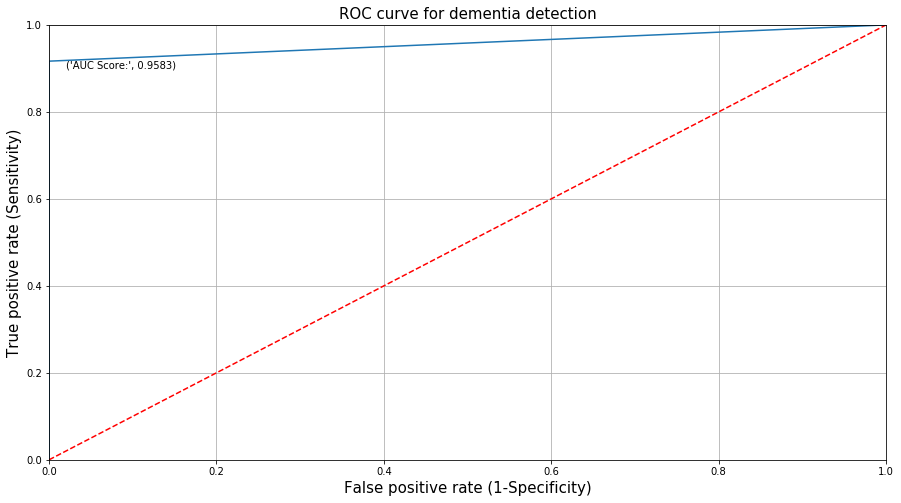

In [196]:
plot_roc(xgb_model)

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>The AUC Score is 0.93.</b>

In [197]:
update_score_card(algorithm_name = 'XG Boost-tuning hyperparameters', model = xgb_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The Accuracy for XG Boost - hyperparameter tuning remains at is 94% and the precision is 100%.</b>


### <span style="color:Red;font-size:1.4em;"><b>  Important features using XGBOOST </b></span> 

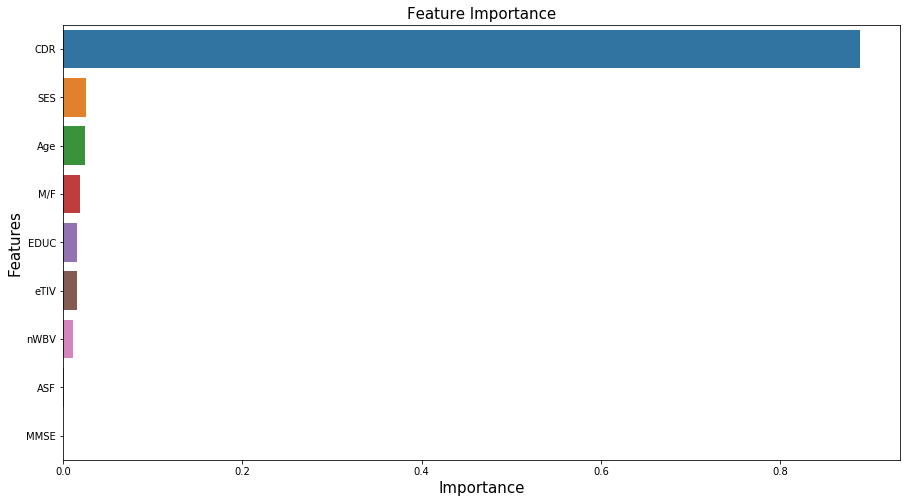

In [198]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [204]:
df.columns

Index(['M/F', 'Age', 'EDUC', 'SES', 'eTIV', 'nWBV', 'ASF', 'Group', 'MMSE',
       'CDR'],
      dtype='object')

In [205]:
X1=df[["nWBV","eTIV","EDUC","M/F","Age","SES","CDR"]]
y1=df["Group"]

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=10)

In [208]:
xgb_model1 = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model1.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

In [209]:
y_pred=xgb_model1.predict(X_test)

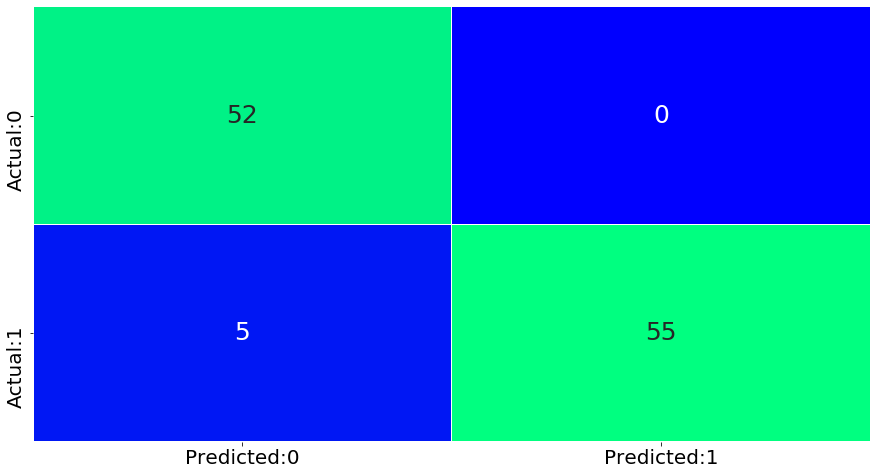

In [210]:
plot_confusion_matrix(xgb_model1)

### Classification Report

In [211]:
test_report = get_test_report(xgb_model1)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



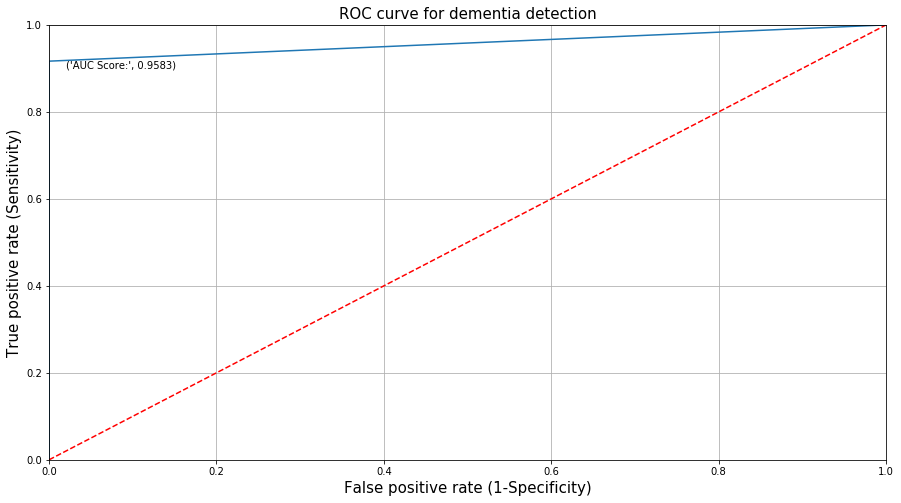

In [213]:
plot_roc(xgb_model1)

In [214]:
update_score_card(algorithm_name = 'XG Boost-imp features', model = xgb_model1)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


 
### <span style="color:Red;font-size:1.4em;"><b> STACKING CLASSIFIER </b></span> 

In [199]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

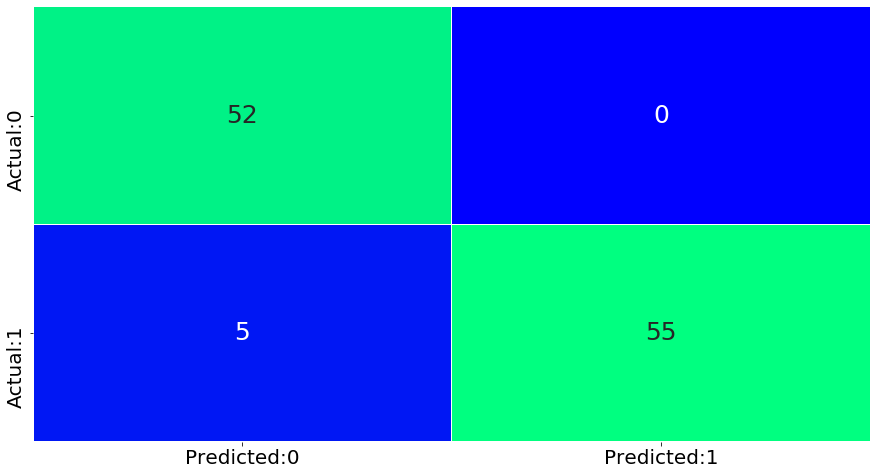

In [200]:
plot_confusion_matrix(stack_model)

### Classification Report-train_data

In [201]:
test_report = get_train_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       138
           1       0.98      0.89      0.94       123

    accuracy                           0.94       261
   macro avg       0.95      0.94      0.94       261
weighted avg       0.95      0.94      0.94       261



### Classification Report-test_data

In [202]:
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [203]:
update_score_card(algorithm_name = 'Stacking classifier', model = stack_model)
score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792
5,knn-hyperparameter tuning,0.892857,0.947436,0.903846,0.870370,0.886792
6,Decision Tree,0.955357,0.958333,1.000000,0.912281,0.954128
7,Decision Tree-hyperparameter tuning,0.955357,0.958333,1.000000,0.912281,0.954128
8,Random Forest,0.964286,0.966667,1.000000,0.928571,0.962963
9,Random Forest-hyperparameter tuning,0.964286,0.966667,1.000000,0.928571,0.962963


<b>Key Insights: <br></b>

1.Most of the cases of dementia observed in the age group of 70 - 80 years of Age.<br>
2.Men develop dementia at early age before 60 years while women have tendency of dementia at later age of later than 60 years<br>
3.In men dementia starts at an education level of 4 years and most prevalent at education level of 12 years and 16 years and it can also extend upto more than 20 years of education level, while in women dementia starts after 5 years of education level and most prevalent around 12 to 13 years of education level and it started to decrease as women's education level increases<br>
4.Dementia is prevalent in Men having highest and lowest socio economic status while women having medium socio economic status have higher dementia cases.<br>
5.Lower values of ASF close to 1 corresponds to severe dementia cases.<br>
6.Severe dementia is diagnosed after minnimum 3 number of visits.<br>